# Predicting AirBnB Prices and Review scores

## Business Understanding

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of its growth initiative, AirBnB is seeking to enhance customer experience and improve business. These insights will help Customer Experience, Business Development and Marketing departments. We will monitor local trends and gain strategic insight on the growth of AirBnB in seattle and on ways of improving the customer experience.

#### Data mining objectives

AirBnb is seeking to know what vibes are happening in each neighbourhood, if there is a general upward trend of new AirBnb listings in Seattle, which factors influence price and customer experience. We want to find if there are metrics which the business can associate with good prices and increased listings.Also to find a good way to measure customer satisfaction and ways that AirBnb hosts can do to get more bookings.

We will use the listings, calendar and reviews datasets for our analysis. We will wrangle and explore this data to understand what data we have and find insights from it to meet our objectives. A large part of this will involve applying transformations to the data, and dealing with missing data.


To summarise, translating our business goals into data mining goals, we have:       
    
    1. What features of the listings are related to price?    
    2. What vibes are happening in each neighbourhood?    
    3. Are there factors/metrics for that help understand customer experience?    
    4. Are there things that guests/AirBnB can do to boost guest experience and get more clients?
    5. Has there been an increase in the number of AirBnb hosts?
    6. What are the busiest times of the year in seattle and by how much do the prices change

clarify who customer and host is
    



#### Data mining problem type

We will mine the data to answer or attempt to answer the data minin objectives. The question of vibes happening in each neighhbourhood,factors that help understand/improve customer experience will require exploratory data analysis. The EDA will be perfomed on features on the listings and review data sets to find the metrics.

The question of factors related to price and guest experience will become either a regression or classification problem for which we will do the modelling. The challenges will be selecting the features that are important and preparing the data for modelling (removing outliers, imputing missing values etc).

To answer the question on price and customer experience will deal with feature engineering. Choosing which features will be used and according to the chosen model, determine the parameters.


#### Criteria for model assessment

The model will be evaluated against tests to ensure its valid. 

The first data mining problems will be approached using descriptive statistics and visualisations of the distributions. By these we will be able to ascertain key metrics and some feature importances.

We will also need to ensure that the metric chosen will satisfy the business requirements for being an adequate representation of customer experience, and that it is not just chosen solely to produce good results from the model (Feature importance)

For the second data mining problem, we will use cross validation to evaluate candidates for modelling the data. We will evaluate using the R2 score and the RMSE if using regression. We could also plot residuals of the model to evaluate skew.

The third data mining problem will follow from the solution of the second data mining problem. We can apply a properly evaluated model on the data in order to assess the feature importance. We will ensure that the features chosen from the feature importance are appropriate for using in a strategy that could conceivably target hosts and how they could improve the guests' experiences.

Finally, it is important to note the broad nature of the project. We will narrow it down to improve customer service. We are only looking to improve guests' customer experience, and this could be limited to certain subsets of the user base. As long as the user base chosen is large enough for potential insights to be significant, then this will contribute towards satisfying our business goals.

#### Action plan

Boiling down the above into a plan, we have:

   1.Explore and understand the data.

   2.Perform exploratory and descriptive analysis in order to find an appropriate response
   variable related to customer experience and price

   3.Based on whether the response variable is continous or discrete either frame a regression
   or classification problem for predicting this response variable.

   4.Clean and tidy the data set in order to prepare it for modelling.

   5.Select candidate algorithms for modelling the data and evaluate them, utilizing cross-validation.

   6.Use the prediction model to ascertain the most important aspects that hosts can improve guests' experience.

   7.Communicate the results as key points that a non-technical business audience could understand.



## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re


In [2]:
!pip install wordcloud

In [3]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fucking/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/fucking/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/fucking/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data Gathering

In [4]:
calender_df=pd.read_csv("calendar.csv", delimiter=',')
listings_df=pd.read_csv("listings.csv", delimiter=',')
reviews_df=pd.read_csv("reviews.csv", delimiter=',')

### Understanding the calender dataset

In [5]:
calender_df.shape

(1393570, 4)

In [6]:
calender_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
# Are there missing values
no_missing_vals_cols=set(calender_df.columns[calender_df.isnull().mean()==0])
no_missing_vals_cols

{'available', 'date', 'listing_id'}

In [8]:
#replace True or false with 1 and 0 for available not available and change 
calender_df=calender_df.replace(to_replace="t",value="1")
calender_df=calender_df.replace(to_replace="f",value="0")
calender_df['available'] = calender_df['available'].astype(int, errors = 'raise')

In [9]:
#Find the proportion of available to unavailable  values
calender_df.available.value_counts()/ calender_df.shape[0]

1    0.67061
0    0.32939
Name: available, dtype: float64

In [10]:
calender_df['price'] = calender_df['price'].str.extract(r'(\d+)', expand=False)
# make price float
calender_df['price'] = calender_df['price'].astype(float, errors = 'raise')

In [11]:
#fill missing price values with mean
calender_df['price'].fillna((calender_df['price'].mean()), inplace=True)

<AxesSubplot:ylabel='listing_id'>

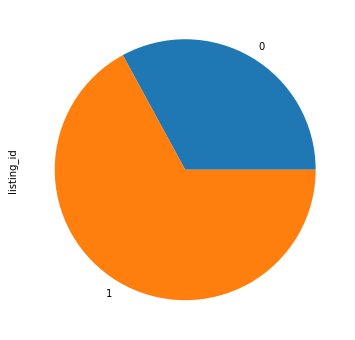

In [12]:
#plot the proportions of available to not available
price_val=calender_df.groupby(['available']).listing_id.count()
price_val.plot.pie(figsize=(6,6))

67% of listings are available and 32.9% are unavailable 365 days.



In [13]:
#check the calender data types
calender_df.dtypes

listing_id      int64
date           object
available       int64
price         float64
dtype: object

The date column is saved as an object, we have to convert it to date time dtype for analysis

In [14]:
#convert the date column from object to datetime
calender_df['date'] =  pd.to_datetime(calender_df['date'])

In [15]:
calender_df.date.dtypes

dtype('<M8[ns]')

A more interesting approach we will need is to split the date time into day of the week, week of the year, month and year. This will help us uncover insights into trends as relates to time

In [16]:
# split date time into day of the week, week of the year, month of the year and year for indepth analysis

# Create new columns
calender_df['dayofweek'] = calender_df['date'].dt.dayofweek
calender_df['weekofyear'] = calender_df['date'].dt.isocalendar().week
calender_df['month'] = calender_df['date'].dt.month
calender_df['year'] = calender_df['date'].dt.year

calender_df[:5]

,listing_id,date,available,price,dayofweek,weekofyear,month,year
0,241032,2016-01-04,1,85.000000,0,1,1,2016
1,241032,2016-01-05,1,85.000000,1,1,1,2016
2,241032,2016-01-06,0,137.090652,2,1,1,2016
3,241032,2016-01-07,0,137.090652,3,1,1,2016
4,241032,2016-01-08,0,137.090652,4,1,1,2016


What we have gathered from the calender data is that listings are grouped into whether or not they are available, their price and date of whether they were available and not available. We learnt that there are 3818 listings in total, 67% available.

To note: We split the datetime into day of the week, week of the year, month and year. This will be useful for our EDA

### Understanding the reviews data

The reviews dataset is small and contains comments made by guests. By knowing frequently used words or words associated with quality, we provide insights for AirBnb hosts

In [33]:
df2=reviews_df
df2.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [110]:
df2.shape

(84849, 6)

In [111]:
df2.dtypes

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [41]:
#convert date to datetime
df2['date'] =  pd.to_datetime(df2['date'])

In [42]:
# split date time into day of the week, week of the year, month of the year and year for indepth analysis
#calender_df.reset_index(inplace=True)

# Create new columns
df2['dayofweek'] = df2['date'].dt.dayofweek
df2['weekofyear'] = df2['date'].dt.isocalendar().week
df2['month'] = df2['date'].dt.month
df2['year'] = df2['date'].dt.year
#calender_df.drop('level_0',inplace=True, axis=1)
df2[:5]

,listing_id,id,date,reviewer_id,reviewer_name,comments,dayofweek,weekofyear,month,year
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...,6,29,7,2015
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...,0,30,7,2015
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb...",6,30,7,2015
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...,6,31,8,2015
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...,0,33,8,2015


In [43]:
def plot_display(plot_words_list):
    wordcloud = WordCloud(width = 1000, height = 700).generate(plot_words_list)
    plt.figure(figsize=(18,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

We will use Natural Language Toolkit, a Natural Language Processing library for python and use it to process the reviews and comments

In [44]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
comments = df2[['comments','listing_id',]]
commentsDFTopper = comments.sort_values('listing_id',ascending=[0])
commentsDFtop=commentsDFTopper.head(30)
reviews = ''
for index,row in commentsDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['comments'])
    reviews+=p

reviews_data=nltk.word_tokenize(reviews)
filtered_data=[word for word in reviews_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
reviews_data=[wnl.lemmatize(data) for data in filtered_data]
reviews_words=' '.join(reviews_data)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/fucking/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/fucking/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/fucking/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Common words among reviews
Words like great,clean,host, flexible, accomodating were frequently used. These are assocatiated with many listings, hosts should strive to get such

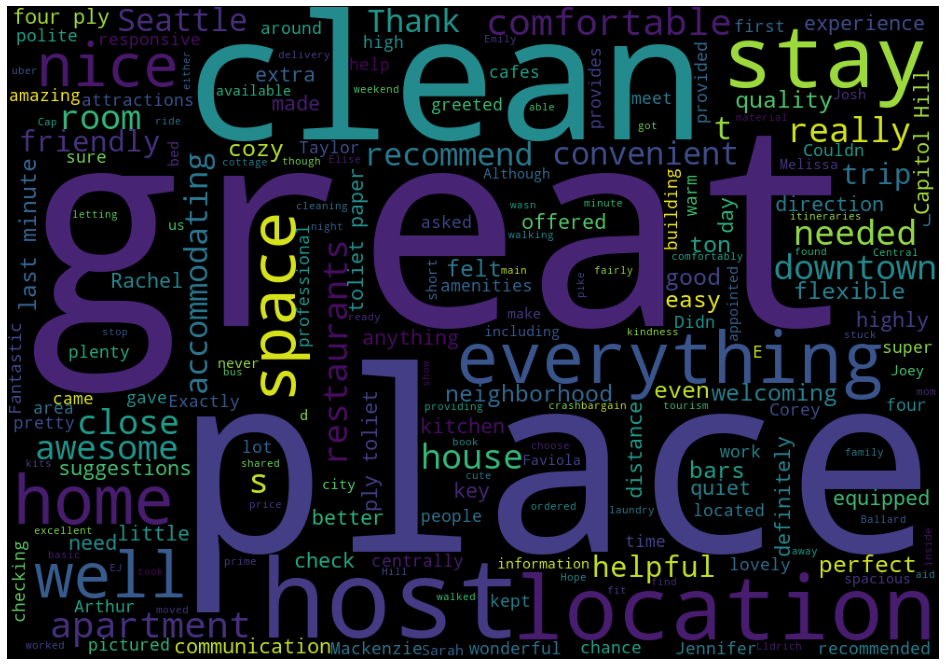

In [411]:
plot_display(reviews)

### Understanding Listings data
We need to look at the data available to us in the listings CSV file, in order to gain understanding of the data.

### Columns
We start with reading in the file and listing out the columns available to us.

In [45]:
listings_df=pd.read_csv("listings.csv", delimiter=',')
listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [8]:
# How many data types do we have
listings_df.dtypes.value_counts()

object     62
float64    17
int64      13
dtype: int64

In [13]:
# Integer columns
listings_df.select_dtypes(include = ["int"])[:5]

,id,scrape_id,host_id,accommodates,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,calculated_host_listings_count
0,241032,20160104002432,956883,4,2,1,365,14,41,71,346,207,2
1,953595,20160104002432,5177328,4,1,2,90,13,13,16,291,43,6
2,3308979,20160104002432,16708587,11,10,4,30,1,6,17,220,20,2
3,7421966,20160104002432,9851441,3,1,1,1125,0,0,0,143,0,1
4,278830,20160104002432,1452570,6,6,1,1125,30,60,90,365,38,1


In [14]:
# Float columns
listings_df.select_dtypes(include = ["float"])[:5]

,host_listings_count,host_total_listings_count,latitude,longitude,bathrooms,bedrooms,beds,square_feet,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,reviews_per_month
0,3.0,3.0,47.636289,-122.371025,1.0,1.0,1.0,NaN,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,4.07
1,6.0,6.0,47.639123,-122.365666,1.0,1.0,1.0,NaN,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.48
2,2.0,2.0,47.629724,-122.369483,4.5,5.0,7.0,NaN,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,1.15
3,1.0,1.0,47.638473,-122.369279,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.0,2.0,47.632918,-122.372471,2.0,3.0,3.0,NaN,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,0.89


In [16]:
# object columns
listings_df.select_dtypes(include = ["object"])[:5]

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,https://www.airbnb.com/rooms/241032,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,...,t,2016-01-04,2011-11-01,2016-01-02,f,WASHINGTON,f,moderate,f,f
1,https://www.airbnb.com/rooms/953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",...,t,2016-01-04,2013-08-19,2015-12-29,f,WASHINGTON,f,strict,t,t
2,https://www.airbnb.com/rooms/3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,...,t,2016-01-04,2014-07-30,2015-09-03,f,WASHINGTON,f,strict,f,f
3,https://www.airbnb.com/rooms/7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,...,t,2016-01-04,NaN,NaN,f,WASHINGTON,f,flexible,f,f
4,https://www.airbnb.com/rooms/278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,...,t,2016-01-04,2012-07-10,2015-10-24,f,WASHINGTON,f,strict,f,f


In [37]:
#which columns have missing values
listings_df.isnull().sum()[listings_df.isna().sum()>0]

summary                         177
space                           569
neighborhood_overview          1032
notes                          1606
transit                         934
thumbnail_url                   320
medium_url                      320
xl_picture_url                  320
host_name                         2
host_since                        2
host_location                     8
host_about                      859
host_response_time              523
host_response_rate              523
host_acceptance_rate            773
host_is_superhost                 2
host_thumbnail_url                2
host_picture_url                  2
host_neighbourhood              300
host_listings_count               2
host_total_listings_count         2
host_has_profile_pic              2
host_identity_verified            2
neighbourhood                   416
zipcode                           7
property_type                     1
bathrooms                        16
bedrooms                    

The listings data set has 92 features/columns. They are obviously too many and we will need to focus.A quick overview of the lists we realise that there are groupings of features. 

1. Columns about reviews, for instance number_of_reviews,first_review, last_review,review_scores_rating,     review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value
2. There are columns related to property like amenitiess, bedrooms, room type etc
3. There are columns related  to location, properties like neighbourhood,zip cde, city. We will want to see    which neighbourhoods are busiest, pricey
4. We also have columns that are related to the host's policies such as price, weekly pricem security                 deposits 
5. Host related attributes like host location, host response time, these features may be important for user           experience

#### Review based columns

In [46]:
# list of columns related to reviews
review_cols = [col for col in listings_df.columns if 'review' in col]
review_cols

['number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month']

In [25]:
listings_df[review_cols].describe()

,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
mean,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000
max,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


There are 3818 rows in total for listings. All columns except for number_of_reviews have missing values. 
Looking at the columns we see some interesting things:

The range between max and min values for number of reviews is 474 which is huge. The mean of 22 is no way close to the median of 9 and the max of 474. 

The standard deviation of the review_scores_rating column at 6.61 is much higher than most other reviewscores columns.

The range of reviews_per_month is a lot smaller than number_of_reviews, with the maximum reviews_per_month at 12.15 compared with the maxium number_of_reviews at 474. This is most likely due to the unbounded time period for which number_of_reviews can be measured, whereas the reviews_per_month is measured over a consistent time period, i.e. a month.

<AxesSubplot:>

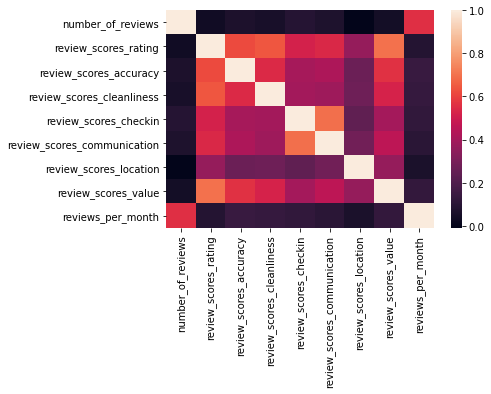

In [47]:
## Whats the correlation between the reviews columns
_df=listings_df[review_cols]
corr=_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Theres strong correlation between basically all the columns except for review scores location.
Review scores checking and review scores communication also have strong correlation.
Another strong correlation is between reviews per month and number of reviews which is understandable since one is subset of the other

One of our data mining objectives is to find out if theres a metric for understanding the quality of guest's experience. The reviews columns can help us answer that.

The review scores rating and seems to be the one that is best suited since the other ones are extensions of and correlated which means they may have been used to calculate the rating.


From our earlier analysis, the review scores rating has 3,171 out of 3,818 values that are not empty for this column, which  means we are missing 17% of our data.

<AxesSubplot:>

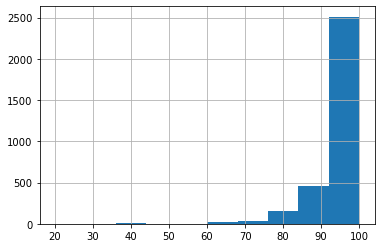

In [31]:
# a look at the review scores rating 
listings_df['review_scores_rating'].hist()

Theres generally high scores for reviews rating skewed positively towards the right which means that reviews scores rating is highly important, getting good reviews is very important for hosts

array([[<AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>]], dtype=object)

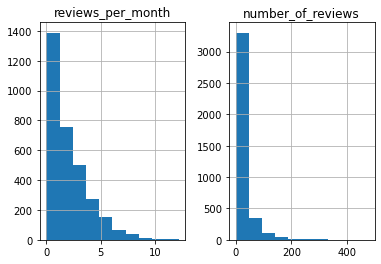

In [33]:
# Another useful metric to note is the number of reviews vs reviews per month
listings_df[['reviews_per_month','number_of_reviews']].hist()

We already knows theres a strong positive correlation between these two. We notice that, the number of reviews occur within a long range, which just means someone may have many reviews because they have been listed longer. But the reviews per month, shows a more accurate picture

In [48]:
listings_df[['number_of_reviews','first_review','last_review','reviews_per_month']][:5]

,number_of_reviews,first_review,last_review,reviews_per_month
0,207,2011-11-01,2016-01-02,4.07
1,43,2013-08-19,2015-12-29,1.48
2,20,2014-07-30,2015-09-03,1.15
3,0,NaN,NaN,NaN
4,38,2012-07-10,2015-10-24,0.89


array([[<AxesSubplot:title={'center':'review_scores_rating'}>,
        <AxesSubplot:title={'center':'reviews_per_month'}>]], dtype=object)

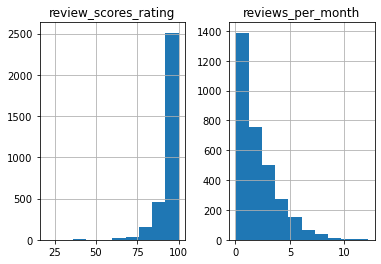

In [38]:
listings_df[['review_scores_rating','reviews_per_month']].hist()

So far we see that the reviews per month and review score rating features are useful features for understanding customer experience and thus improving customer experience. As expected some users/hosts have many reviews but fewer reviews per month suggesting they have been listed longer but not neccesarily that they are perfoming better than those with fewer number of ratigs but higher reviews per month

Note: For Data preparation, we may consider a relation between these two features as a response variable for modelling customer experience

#### Price and related features

In [40]:
new_price_col=['price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights','weekly_price', 'monthly_price']


The money columns contain the dollar sign and are of object type. We need to remove the dollar sign and convert the data type to float for quantitative analysis

In [42]:
# We need to remove all $ to the columns 
listings_df['price'] = listings_df['price'].str.extract(r'(\d+)', expand=False)
listings_df['weekly_price'] = listings_df['weekly_price'].str.extract(r'(\d+)', expand=False)
listings_df['monthly_price'] = listings_df['monthly_price'].str.extract(r'(\d+)', expand=False)
listings_df['security_deposit'] = listings_df['security_deposit'].str.extract(r'(\d+)', expand=False)
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].str.extract(r'(\d+)', expand=False)
listings_df['extra_people'] = listings_df['extra_people'].str.extract(r'(\d+)', expand=False)

In [43]:
# change the money values to float
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].astype(float, errors = 'raise')
listings_df['security_deposit'] = listings_df['security_deposit'].astype(float, errors = 'raise')
listings_df['extra_people'] = listings_df['extra_people'].astype(float, errors = 'raise')
listings_df['price'] = listings_df['price'].astype(float, errors = 'raise')
listings_df['weekly_price'] = listings_df['weekly_price'].astype(float, errors = 'raise')
listings_df['monthly_price'] = listings_df['monthly_price'].astype(float, errors = 'raise')

In [44]:
listings_df[new_price_col][:5]

,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,weekly_price,monthly_price
0,85.0,NaN,NaN,2,5.0,1,365,NaN,NaN
1,150.0,100.0,40.0,1,0.0,2,90,1.0,3.0
2,975.0,1.0,300.0,10,25.0,4,30,NaN,NaN
3,100.0,NaN,NaN,1,0.0,1,1125,650.0,2.0
4,450.0,700.0,125.0,6,15.0,1,1125,NaN,NaN


In [45]:
# check for missing values in the columns
listings_df[new_price_col].isnull().sum()[listings_df[new_price_col].isnull().sum()>0]

security_deposit    1952
cleaning_fee        1030
weekly_price        1809
monthly_price       2301
dtype: int64

In [263]:
# What are the summary statics saying
listings_df[new_price_col].describe()

,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,weekly_price,monthly_price
count,3818.00000,1866.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000,2009.000000,1517.000000
mean,127.71451,247.292069,61.710904,1.672603,10.667627,2.369303,780.447617,433.651070,67.986816
std,89.16278,153.486417,48.830341,1.311040,17.585922,16.305902,1683.589007,296.675884,225.403680
min,1.00000,1.000000,5.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,75.00000,100.000000,25.000000,1.000000,0.000000,1.000000,60.000000,232.000000,1.000000
50%,100.00000,200.000000,50.000000,1.000000,0.000000,2.000000,1125.000000,476.000000,2.000000
75%,150.00000,300.000000,83.000000,2.000000,20.000000,2.000000,1125.000000,650.000000,3.000000
max,999.00000,995.000000,300.000000,15.000000,300.000000,1000.000000,100000.000000,999.000000,995.000000


Security deposit has 48% listings, lots of missing values. It has a huge range between the maximum and minimum and the mean. It also has a huge standard deviation. There seems to be different charges that are not standardized perhaps related to other factors like neighbourhood, property type etc. We will invest that further in EDA. Maximum nights have very high values. 75% of listings have up to 20 extra people

<ipython-input-52-1b5312bb5443>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  listings_df[new_price_col].hist(ax=ax)


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'security_deposit'}>,
        <AxesSubplot:title={'center':'cleaning_fee'}>],
       [<AxesSubplot:title={'center':'guests_included'}>,
        <AxesSubplot:title={'center':'extra_people'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>],
       [<AxesSubplot:title={'center':'maximum_nights'}>,
        <AxesSubplot:title={'center':'weekly_price'}>,
        <AxesSubplot:title={'center':'monthly_price'}>]], dtype=object)

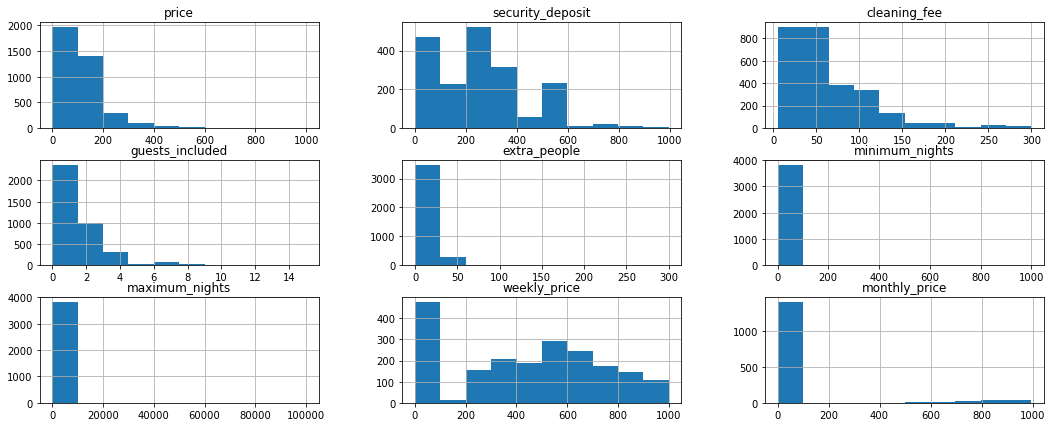

In [52]:
fig = plt.figure(figsize = (18,7))
ax = fig.gca()
listings_df[new_price_col].hist(ax=ax)


It is important while we notice the hist plot to remember that there are some extremely high values (outliers) that may be affecting the distributions. 50% of security deposits are around 200 dollars, Theres a little over 400 listings with security deposits between 0 and 100 which is almost as much as the 50 percent. Of those that charge security deposits,an average of 200 listings charge between 100 dollars to 150 dollars and 300 dollars to 400 dollars. Of those that charge security fees, more than half charge between 0  and 60 dollars. Theres about 1/4 that charge between 60 dollars and 120 dollars. 
On guests included most listings have between 0 and 1 extra guests. Most listings have between 0 and 20 extra people included. 

<AxesSubplot:>

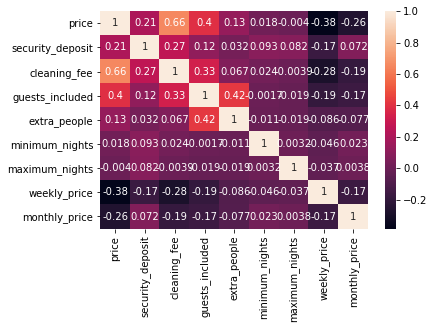

In [46]:
## Whats the correlation between the money columns
_df2=listings_df[new_price_col]
_corr2=_df2.corr()
sns.heatmap(_corr2, xticklabels=_corr2.columns.values, yticklabels=_corr2.columns.values, annot = True)

Price and cleaning fee have a correlation, likely the cleaning fee is added to the price

#### Location based columns

In [48]:
# look for columns with the word columns in them
location_cols = [col for col in listings_df.columns if 'location' in col]
location_cols

['host_location',
 'smart_location',
 'is_location_exact',
 'review_scores_location']

In [145]:
listings_df[location_cols][:5]

,host_location,smart_location,is_location_exact,review_scores_location
0,"Seattle, Washington, United States","Seattle, WA",t,9.0
1,"Seattle, Washington, United States","Seattle, WA",t,10.0
2,"Seattle, Washington, United States","Seattle, WA",t,10.0
3,"Seattle, Washington, United States","Seattle, WA",t,NaN
4,"Seattle, Washington, United States","Seattle, WA",t,9.0


In [153]:
listings_df[location_cols][:5].dtypes

host_location              object
smart_location             object
is_location_exact           int64
review_scores_location    float64
dtype: object

In [49]:
# is location exact has T, F for Yes or No, True or false we replace it with True or false

listings_df['is_location_exact']=listings_df['is_location_exact'].replace(to_replace="t",value="1")
listings_df['is_location_exact']=listings_df['is_location_exact'].replace(to_replace="f",value="0")

In [50]:
# change is_location_exact from int to Int
listings_df['is_location_exact'] = listings_df['is_location_exact'].astype(int, errors = 'raise')

In [51]:
listings_df[location_cols][:5]

,host_location,smart_location,is_location_exact,review_scores_location
0,"Seattle, Washington, United States","Seattle, WA",1,9.0
1,"Seattle, Washington, United States","Seattle, WA",1,10.0
2,"Seattle, Washington, United States","Seattle, WA",1,10.0
3,"Seattle, Washington, United States","Seattle, WA",1,NaN
4,"Seattle, Washington, United States","Seattle, WA",1,9.0


In [52]:
# are there columns with missing values
listings_df[location_cols].isnull().sum()[listings_df[location_cols].isnull().sum()>0]

host_location               8
review_scores_location    655
dtype: int64

The review scores location has the key word location in it but has been considered more relevantly under the review based columns so we will drop it. Also, upon rechecking the listings data see there are other columns that deal with location but dont have location in their column names. We include these here along with the location cols

In [58]:
location_cols=['city','state','zipcode','market','smart_location','country_code','country','host_location','is_location_exact']

In [190]:
listings_df[location_cols][:5]

,city,state,zipcode,market,smart_location,country_code,country,host_location,is_location_exact
0,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,"Seattle, Washington, United States",1
1,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,"Seattle, Washington, United States",1
2,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,"Seattle, Washington, United States",1
3,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,"Seattle, Washington, United States",1
4,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,"Seattle, Washington, United States",1


In [191]:
#exclude the is_location exact and find some summary stats
listings_df[['city','state','zipcode','market','smart_location','country_code','country']].describe()

,city,state,zipcode,market,smart_location,country_code,country
count,3818,3818,3811,3818,3818,3818,3818
unique,7,2,28,1,7,1,1
top,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States
freq,3810,3817,420,3818,3810,3818,3818


Zip code has the most count of unique entries with 27 different entries, city has 7 unique entries, the rest are probably the same for instance, same market, country code and country. So we exclude country, country code and state to see what we can learn. Almost all listings are in Seattle, WA thats where we have  99.9% of listings, other areas have 1%

In [198]:
listings_df[['city','state','zipcode','smart_location']].groupby(['city']).count()

,state,zipcode,smart_location
city,,,
"Ballard, Seattle",1,1,1
Phinney Ridge Seattle,1,1,1
Seattle,3810,3803,3810
Seattle,2,2,2
West Seattle,2,2,2
seattle,1,1,1
西雅图,1,1,1


<AxesSubplot:>

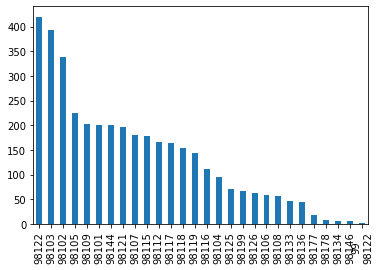

In [210]:
(listings_df['zipcode'].value_counts()).plot(kind="bar")

We see that there are zipcodes that have more listings like the 98122, 98103 and 98102. These are generally higher, the bulk of the listings are on average the same until we get to 98104. Then we see 98199, 126,106,108,133,136 have about the same listings around the 50-60 listings average

### Host attributes columns

In [56]:
host_cols = [col for col in listings_df.columns if 'host' in col]
host_cols

['host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'calculated_host_listings_count']

In [267]:
listings_df[host_cols][:5]

,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count
0,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,2
1,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,6
2,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67%,100%,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,2
3,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,https://a2.muscache.com/ac/users/9851441/profi...,https://a2.muscache.com/ac/users/9851441/profi...,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,1
4,1452570,https://www.airbnb.com/users/show/1452570,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,100%,NaN,f,https://a0.muscache.com/ac/users/1452570/profi...,https://a0.muscache.com/ac/users/1452570/profi...,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,1


In [57]:
#create a host listings df from the listings,a df that contains only listing data
host_listings_df=listings_df[host_cols].copy()

In [62]:
# find some correlations on the host listing columns
host_listings_df.corr()

,host_id,host_listings_count,host_total_listings_count,calculated_host_listings_count
host_id,1.000000,-0.069613,-0.069613,-0.176040
host_listings_count,-0.069613,1.000000,1.000000,0.224222
host_total_listings_count,-0.069613,1.000000,1.000000,0.224222
calculated_host_listings_count,-0.176040,0.224222,0.224222,1.000000


The corr( ) function returns 4 features, host_id, listings_count, total_listings_count and calculated host listings count. There is no description from AirBnb on what these columns are. We see strong positive 100 percent correlation between host listings  count and host total listings count and no other correlation. These two might be the same thing

In [58]:
#host_listings_df
pct_to_float = lambda x: x.str.replace(r'%', r'.0').astype('float') / 100.0

# note that the percentages are now in float e.g 96% is 0.96
# Apply the function to the rate cols

host_listings_df[['host_response_rate','host_acceptance_rate']] = host_listings_df[['host_response_rate','host_acceptance_rate']].apply(pct_to_float, axis=1)

In [282]:
host_listings_df[:5]

,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count
0,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,0.96,1.0,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,2
1,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,0.98,1.0,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,6
2,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,0.67,1.0,f,https://a1.muscache.com/ac/users/16708587/prof...,https://a1.muscache.com/ac/users/16708587/prof...,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,2
3,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,https://a2.muscache.com/ac/users/9851441/profi...,https://a2.muscache.com/ac/users/9851441/profi...,Queen Anne,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,1
4,1452570,https://www.airbnb.com/users/show/1452570,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,1.00,NaN,f,https://a0.muscache.com/ac/users/1452570/profi...,https://a0.muscache.com/ac/users/1452570/profi...,Queen Anne,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,1


We beging to investigate the **host listings**, theres a number of features, we investigate them in smaller batches starting with the rates

array([[<AxesSubplot:title={'center':'host_response_rate'}>,
        <AxesSubplot:title={'center':'host_acceptance_rate'}>]],
      dtype=object)

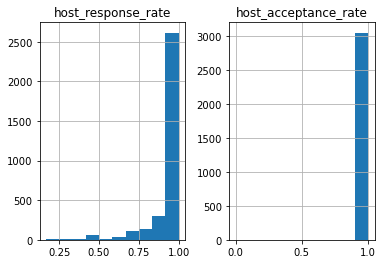

In [59]:
host_listings_df[['host_response_rate','host_acceptance_rate']].hist()

host acceptance rate is always 100% in all occurences, there are no rejections from hosts, host response rate is also almost always 100%, very few hosts have less than 80% response rate

One of the data mining questions is about the **increase in listings in AirBnb**, we look at the host since feature

In [60]:
# convert it to date time
host_listings_df['host_since']=pd.to_datetime(host_listings_df['host_since'])


In [61]:
# split the date time into week,month and year
host_listings_df['dayofweek'] = host_listings_df['host_since'].dt.dayofweek
host_listings_df['weekofyear'] = host_listings_df['host_since'].dt.isocalendar().week
host_listings_df['month'] = host_listings_df['host_since'].dt.month
host_listings_df['year'] = host_listings_df['host_since'].dt.year

In [296]:
host_listings_df[:5]

,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,dayofweek,weekofyear,month,year
0,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,0.96,1.0,f,...,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,2,3.0,32,8.0,2011.0
1,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,0.98,1.0,t,...,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,6,3.0,8,2.0,2013.0
2,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,0.67,1.0,f,...,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,2,3.0,24,6.0,2014.0
3,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,NaN,NaN,f,...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,1,2.0,45,11.0,2013.0
4,1452570,https://www.airbnb.com/users/show/1452570,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,1.00,NaN,f,...,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,1,1.0,48,11.0,2011.0


We want to see the statistics of which days of the week, week of the year occur more and what those trends are

In [62]:
host_listings_df[['host_since','dayofweek','weekofyear','month','year']].describe()

,dayofweek,weekofyear,month,year
count,3816.000000,3816.000000,3816.000000,3816.000000
mean,2.634696,26.816038,6.551887,2013.214623
std,2.013244,13.972345,3.208349,1.560423
min,0.000000,1.000000,1.000000,2008.000000
25%,1.000000,15.000000,4.000000,2012.000000
50%,2.000000,28.000000,7.000000,2013.000000
75%,4.000000,38.000000,9.000000,2015.000000
max,6.000000,53.000000,12.000000,2016.000000


On average, about half of the hosts have been hosts since July 2013 and interestingly joined on a Wednesday. The maximum year is 2016 because this dataset was compiled in 2016.

array([[<AxesSubplot:title={'center':'dayofweek'}>,
        <AxesSubplot:title={'center':'weekofyear'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>]],
      dtype=object)

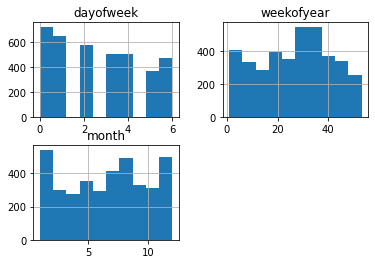

In [305]:
host_listings_df[['host_since','dayofweek','weekofyear','month']].hist()

The highest number of hosts joined on the first day of the week and second day of the week (According to google,in the US thats Sunday and Monday). The distribution of the months is spread accross the whole year, with the most joining between weeks 26 and 38. The months distribution provides us an even clearer picture showing highest joins beginning, mid and end of the year.

<AxesSubplot:>

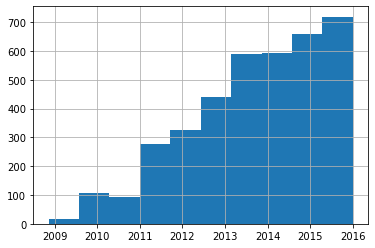

In [304]:
host_listings_df['host_since'].hist()

This answers one of our data mining questions on whether there has been an increase in hosts joining AirBnb. **Since 2008 when AirBnb started, there has been a huge growth**, with each year there's at least an increament of 100. Airbnb is experiencing significant growth.

In [361]:
host_listings_df[['host_since','year','host_neighbourhood']].groupby(['year']).count()

,host_since,host_neighbourhood
year,,
2008.0,4,4
2009.0,64,63
2010.0,149,146
2011.0,398,389
2012.0,539,514
2013.0,776,723
2014.0,900,809
2015.0,981,866
2016.0,5,4


This further elaborates our findings that there's an upward trend of AirBnB listings since 2008 to 2016. In 10 years, there was a growth from 4 listings to 3816 listings, the growth is exponential. Between 2009 and 2011 the growth rate doubled at a average growth rate of 140% per year. From 2011 the growth rate steadied to an average growth rate of 30%. 2016 has a suprisingly low number possibly due to when this data was collected. We will investigate this. Otherwise, between 2008 and 2016, we see AirBnb listings grow significantly.

In [67]:
host_listings_df['host_since'].describe(datetime_is_numeric=True)

count                             3816
mean     2013-09-18 17:26:02.264153856
min                2008-11-10 00:00:00
25%                2012-08-17 00:00:00
50%                2013-12-12 12:00:00
75%                2015-01-14 00:00:00
max                2016-01-03 00:00:00
Name: host_since, dtype: object

An investigation into the host since column reveals why 2016 has such a low count for listings. The dataset was collected 03-01-2016, on just 3 days of January there was already 4 listings at 1.33 listings per day.

In [358]:
listings_df[['host_since','neighbourhood_cleansed']].describe()

,host_since,neighbourhood_cleansed
count,3816,3818
unique,1380,87
top,2013-08-30,Broadway
freq,51,397


There are 87 neighbourhoods listed. Broadway is the most frequently listed neighbourhood which occurs 397 times

In [372]:
host_listings_df['host_is_superhost'].value_counts()/host_listings_df.shape[0]

f    0.795705
t    0.203772
Name: host_is_superhost, dtype: float64

For 70% of the listings the host is not the superhost

In [375]:
host_listings_df['host_has_profile_pic'].value_counts()/host_listings_df.shape[0]

t    0.997643
f    0.001833
Name: host_has_profile_pic, dtype: float64

Every host has a profile picture, probably only 1 host in the entire listing doesnt have a picture

In [378]:
host_listings_df['host_identity_verified'].value_counts()/host_listings_df.shape[0]

t    0.784966
f    0.214510
Name: host_identity_verified, dtype: float64

Most host's identities are verified, only 21.4% of hosts aren't verified

In [380]:
host_listings_df['host_verifications'].describe()

count                                                 3818
unique                                                 116
top       ['email', 'phone', 'facebook', 'reviews', 'kba']
freq                                                   595
Name: host_verifications, dtype: object

There are as many host verifications as there are listings. I assume since its unspecified that host verifications are information about hosts that are given out by the hosts to verify. Most hosts provide email, phone, facebook, reviews and kba for verification

In [382]:
host_listings_df['host_response_time'].value_counts()/host_listings_df.shape[0]

within an hour        0.443164
within a few hours    0.253536
within a day          0.156365
a few days or more    0.009953
Name: host_response_time, dtype: float64

44% of hosts respond within an hour, while 25% respond within a few hours, meaning that a total of 69% of hosts respond well in time guests. 15% will respond within a day. Basically hosts respond at most within a day


In [385]:
host_listings_df['host_thumbnail_url'].describe()

count                                                  3816
unique                                                 2743
top       https://a2.muscache.com/ac/pictures/a4d7d053-c...
freq                                                     46
Name: host_thumbnail_url, dtype: object

In [387]:
host_listings_df['host_url'].describe()

count                                          3818
unique                                         2751
top       https://www.airbnb.com/users/show/8534462
freq                                             46
Name: host_url, dtype: object

The same is true of host urls, every host has a url

In [394]:
host_listings_df['host_name'].describe()

count       3816
unique      1466
top       Andrew
freq          56
Name: host_name, dtype: object

In [397]:
host_listings_df['host_about'].describe()


count                                                  2959
unique                                                 2011
top       It would be my pleasure to share and explore t...
freq                                                     46
Name: host_about, dtype: object

Every host has a thumbnail, they aren't very unique.The most frequently used one is shown

In [408]:
host_listings_df['host_neighbourhood'].describe()

count             3518
unique             102
top       Capitol Hill
freq               405
Name: host_neighbourhood, dtype: object

Most hosts stay in capitol Hill

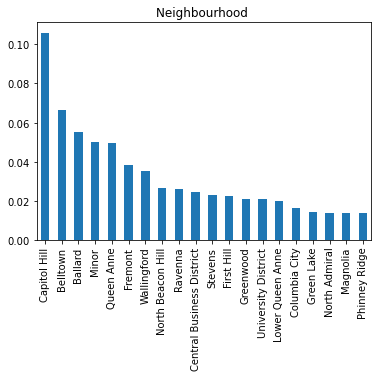

In [691]:
count_vals = host_listings_df.host_neighbourhood.value_counts()
(count_vals[:20]/host_listings_df.shape[0]).plot(kind="bar");
plt.title("Neighbourhood ");

### Policies columns

Here we look at columns that related to host policy like 'requires_license', 'license', 'jurisdiction_names', instant_bookable', 'cancellation_policy', 'require_guest_profile_picture',  'require_guest_phone_verification'


       

In [429]:
policies=['requires_license', 'license', 'jurisdiction_names', 'instant_bookable', 'cancellation_policy','experiences_offered', 'require_guest_profile_picture',  'require_guest_phone_verification']

In [430]:
policies_df=listings_df[policies]

In [431]:
policies_df[:5]

,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,experiences_offered,require_guest_profile_picture,require_guest_phone_verification
0,f,NaN,WASHINGTON,f,moderate,none,f,f
1,f,NaN,WASHINGTON,f,strict,none,t,t
2,f,NaN,WASHINGTON,f,strict,none,f,f
3,f,NaN,WASHINGTON,f,flexible,none,f,f
4,f,NaN,WASHINGTON,f,strict,none,f,f


In [423]:
policies_df['requires_license'].value_counts()/policies_df.shape[0]

f    1.0
Name: requires_license, dtype: float64

All of the listings do not require license

In [425]:
policies_df['require_guest_phone_verification'].value_counts()/policies_df.shape[0]

f    0.901781
t    0.098219
Name: require_guest_phone_verification, dtype: float64

90% of hosts do not require guest phone verification

In [426]:
policies_df['require_guest_profile_picture'].value_counts()/policies_df.shape[0]

f    0.915925
t    0.084075
Name: require_guest_profile_picture, dtype: float64

91% of hosts do not require guest profile picture

In [427]:
policies_df['cancellation_policy'].value_counts()/policies_df.shape[0]

strict      0.371137
moderate    0.327658
flexible    0.301205
Name: cancellation_policy, dtype: float64

On cancelation policy, hosts are split almost evenly between strict, moderate and flexible. 37% being very strict on cancelation

In [428]:
policies_df['instant_bookable'].value_counts()/policies_df.shape[0]

f    0.845207
t    0.154793
Name: instant_bookable, dtype: float64

About 84.5% of listings are not instant bookable

In [432]:
policies_df['experiences_offered'].value_counts()

none    3818
Name: experiences_offered, dtype: int64

In [433]:
available=['has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365']

In [434]:
available_df=listings_df[available]

In [440]:
available_df[:5]

,has_availability,availability_30,availability_60,availability_90,availability_365
0,t,14,41,71,346
1,t,13,13,16,291
2,t,1,6,17,220
3,t,0,0,0,143
4,t,30,60,90,365


In [441]:
available_df['has_availability'].value_counts()

t    3818
Name: has_availability, dtype: int64

All have availability. All listings have availability in general. We just have to inspect how much availability they have

In [446]:
available_df[['availability_30', 'availability_60', 'availability_90', 'availability_365']].describe()

,availability_30,availability_60,availability_90,availability_365
count,3818.000000,3818.000000,3818.000000,3818.000000
mean,16.786276,36.814825,58.082504,244.772656
std,12.173637,23.337541,34.063845,126.772526
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,13.000000,28.000000,124.000000
50%,20.000000,46.000000,73.000000,308.000000
75%,30.000000,59.000000,89.000000,360.000000
max,30.000000,60.000000,90.000000,365.000000


On average, about 17 houses have availability 30 days, 37 have availability 60 days a year, 58 for 90 days a year and about 245 have availability 365 days of the year.

### Property related columns

In [453]:
property_=['id','property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type','amenities']

In [454]:
property_df=listings_df[property_]

In [455]:
property_df[:5]

,id,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities
0,241032,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,953595,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,3308979,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,7421966,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,278830,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


In [472]:
property_df.groupby(['room_type']).id.count()/property_df.shape[0]

room_type
Entire home/apt    0.665532
Private room       0.303824
Shared room        0.030644
Name: id, dtype: float64

<AxesSubplot:ylabel='id'>

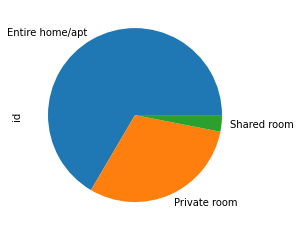

In [474]:
(property_df.groupby(['room_type']).id.count()/property_df.shape[0]).plot(kind="pie")

66.5% of properties are are entire homes/appartments. 30% are private rooms, only 3% of listings are shared rooms

In [462]:
property_df.groupby(['property_type']).id.count()/property_df.shape[0]

property_type
Apartment          0.447355
Bed & Breakfast    0.009691
Boat               0.002095
Bungalow           0.003405
Cabin              0.005500
Camper/RV          0.003405
Chalet             0.000524
Condominium        0.023834
Dorm               0.000524
House              0.453903
Loft               0.010477
Other              0.005762
Tent               0.001310
Townhouse          0.030906
Treehouse          0.000786
Yurt               0.000262
Name: id, dtype: float64

<AxesSubplot:xlabel='property_type'>

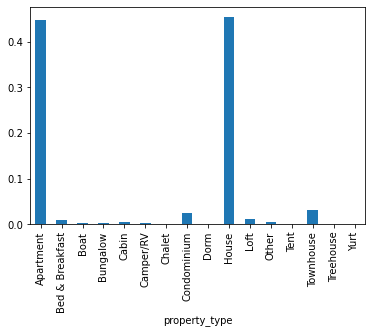

In [477]:
(property_df.groupby(['property_type']).id.count()/property_df.shape[0]).plot(kind="bar")

Appartments and houses are the most common properties with 45% and 44.7% respectively. Bed and breakfast at 95 and the rest shared between other property types

In [463]:
property_df.groupby(['bed_type']).id.count()/property_df.shape[0]

bed_type
Airbed           0.007072
Couch            0.003405
Futon            0.019382
Pull-out Sofa    0.012310
Real Bed         0.957831
Name: id, dtype: float64

<AxesSubplot:xlabel='bed_type'>

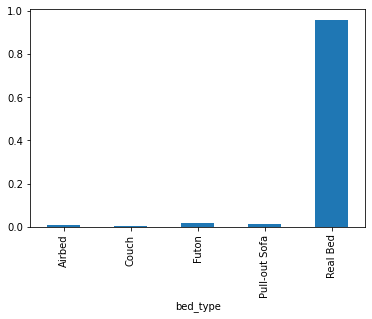

In [478]:
(property_df.groupby(['bed_type']).id.count()/property_df.shape[0]).plot(kind="bar")

95% of beds listed are real beds, about 2% being Futons and the rest not beds

In [464]:
property_df.groupby(['accommodates']).id.count()/property_df.shape[0]

accommodates
1     0.067051
2     0.426139
3     0.104243
4     0.205605
5     0.048193
6     0.086957
7     0.013620
8     0.031168
9     0.003405
10    0.006548
11    0.000786
12    0.003929
14    0.000786
15    0.000524
16    0.001048
Name: id, dtype: float64

<AxesSubplot:xlabel='accommodates'>

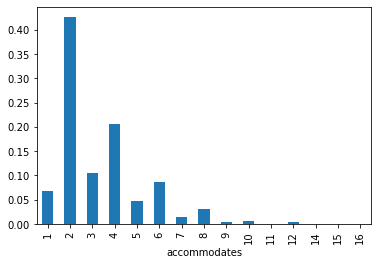

In [480]:
(property_df.groupby(['accommodates']).id.count()/property_df.shape[0]).plot(kind="bar")

42% of listings accomodate a maximum of 2 guests, 20% accomodate 4, 10% accomodate 3, smaller percentages can accomodate more than 4 people. This makes sense since most listings are houses and apartments

In [465]:
property_df.groupby(['bedrooms']).id.count()/property_df.shape[0]

bedrooms
0.0    0.097433
1.0    0.633054
2.0    0.167627
3.0    0.074123
4.0    0.018072
5.0    0.006286
6.0    0.001572
7.0    0.000262
Name: id, dtype: float64

<AxesSubplot:xlabel='bedrooms'>

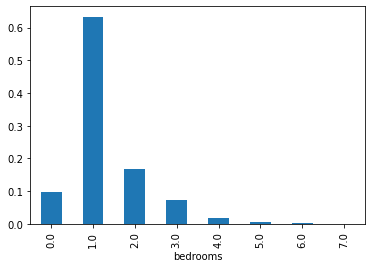

In [481]:
(property_df.groupby(['bedrooms']).id.count()/property_df.shape[0]).plot(kind="bar")

63% of listings offer 1 bedroom while 16.7% have 2 bedrooms. 9% have no bedrooms at all

In [491]:
amenities_df=property_df['amenities']


Ammenities are in textual form but can be made into categories since there are frequently reccurring features. Also we can use wordcloud to map some of the most frequently occuring words

In [492]:
# drop empty rows in amenities
amenities_df = amenities_df[amenities_df != '{}']

In [493]:
# create a list of amenities, removing the {} and "" and split each word with a comma
amenities_list = []

for index, row in amenities_df.items():
    amenities_list.append(row.replace('{','').replace('}','').replace('"','').split(','))

amenities_list[:3]

[['TV',
  'Cable TV',
  'Internet',
  'Wireless Internet',
  'Air Conditioning',
  'Kitchen',
  'Heating',
  'Family/Kid Friendly',
  'Washer',
  'Dryer'],
 ['TV',
  'Internet',
  'Wireless Internet',
  'Kitchen',
  'Free Parking on Premises',
  'Buzzer/Wireless Intercom',
  'Heating',
  'Family/Kid Friendly',
  'Washer',
  'Dryer',
  'Smoke Detector',
  'Carbon Monoxide Detector',
  'First Aid Kit',
  'Safety Card',
  'Fire Extinguisher',
  'Essentials'],
 ['TV',
  'Cable TV',
  'Internet',
  'Wireless Internet',
  'Air Conditioning',
  'Kitchen',
  'Free Parking on Premises',
  'Pets Allowed',
  'Pets live on this property',
  'Dog(s)',
  'Cat(s)',
  'Hot Tub',
  'Indoor Fireplace',
  'Heating',
  'Family/Kid Friendly',
  'Washer',
  'Dryer',
  'Smoke Detector',
  'Carbon Monoxide Detector',
  'Essentials',
  'Shampoo']]

Now that we have ammenities as a list, we can add this as a column and one hot encode it to represent the categorical variables ( Stack overflow and kaggle ) have explanations on how this is done. We will use that snippet from there

In [495]:
new_amenities_df = pd.Series(amenities_list, name = 'amenities').to_frame()
new_amenities_df[:5]

,amenities
0,"[TV, Cable TV, Internet, Wireless Internet, Ai..."
1,"[TV, Internet, Wireless Internet, Kitchen, Fre..."
2,"[TV, Cable TV, Internet, Wireless Internet, Ai..."
3,"[Internet, Wireless Internet, Kitchen, Indoor ..."
4,"[TV, Cable TV, Internet, Wireless Internet, Ki..."


In [496]:
dummies_amenities_df = new_amenities_df.drop('amenities', 1).join(
    pd.get_dummies(
        pd.DataFrame(new_amenities_df.amenities.tolist()).stack()
    ).astype(int).sum(level=0)
)

dummies_amenities_df

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,0,1
2,0,1,0,0,1,1,1,1,0,1,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,1,1,1,0,0,0,1,0,0,1
4,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3768,0,1,0,0,1,0,0,0,0,1,...,0,1,1,0,0,1,1,0,1,1
3769,1,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
3770,0,0,1,0,1,0,1,1,0,1,...,1,0,1,0,0,0,1,0,0,1
3771,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


Now we have all the buzz words as columns

In [497]:
dummies_amenities_df.columns

Index(['24-Hour Check-in', 'Air Conditioning', 'Breakfast',
       'Buzzer/Wireless Intercom', 'Cable TV', 'Carbon Monoxide Detector',
       'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer', 'Elevator in Building',
       'Essentials', 'Family/Kid Friendly', 'Fire Extinguisher',
       'First Aid Kit', 'Free Parking on Premises', 'Gym', 'Hair Dryer',
       'Hangers', 'Heating', 'Hot Tub', 'Indoor Fireplace', 'Internet', 'Iron',
       'Kitchen', 'Laptop Friendly Workspace', 'Lock on Bedroom Door',
       'Other pet(s)', 'Pets Allowed', 'Pets live on this property', 'Pool',
       'Safety Card', 'Shampoo', 'Smoke Detector', 'Smoking Allowed',
       'Suitable for Events', 'TV', 'Washer', 'Washer / Dryer',
       'Wheelchair Accessible', 'Wireless Internet'],
      dtype='object')

In [503]:
dummies_amenities_df.sum()

24-Hour Check-in               616
Air Conditioning               677
Breakfast                      291
Buzzer/Wireless Intercom       538
Cable TV                      1446
Carbon Monoxide Detector      2485
Cat(s)                         382
Dog(s)                         509
Doorman                         85
Dryer                         2997
Elevator in Building           785
Essentials                    3237
Family/Kid Friendly           1963
Fire Extinguisher             2196
First Aid Kit                 1680
Free Parking on Premises      2167
Gym                            442
Hair Dryer                     774
Hangers                        846
Heating                       3627
Hot Tub                        303
Indoor Fireplace               886
Internet                      2811
Iron                           742
Kitchen                       3423
Laptop Friendly Workspace      745
Lock on Bedroom Door           100
Other pet(s)                    51
Pets Allowed        

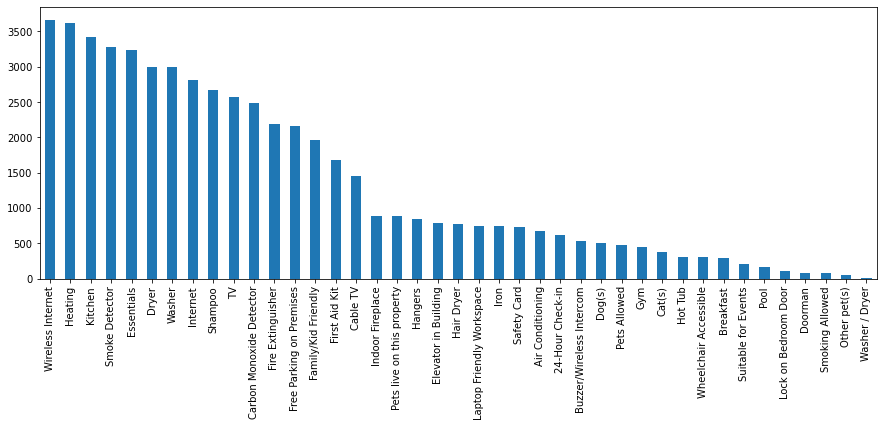

In [514]:
dummies_amenities_df.sum().sort_values(ascending = False).plot(kind='bar', figsize = (15,5));

There is a long list of amenities on offer, washer/Dryer has only  occurences, it might be the only amenity that is insignificant

In [512]:
amenitiesDF = listings_df[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

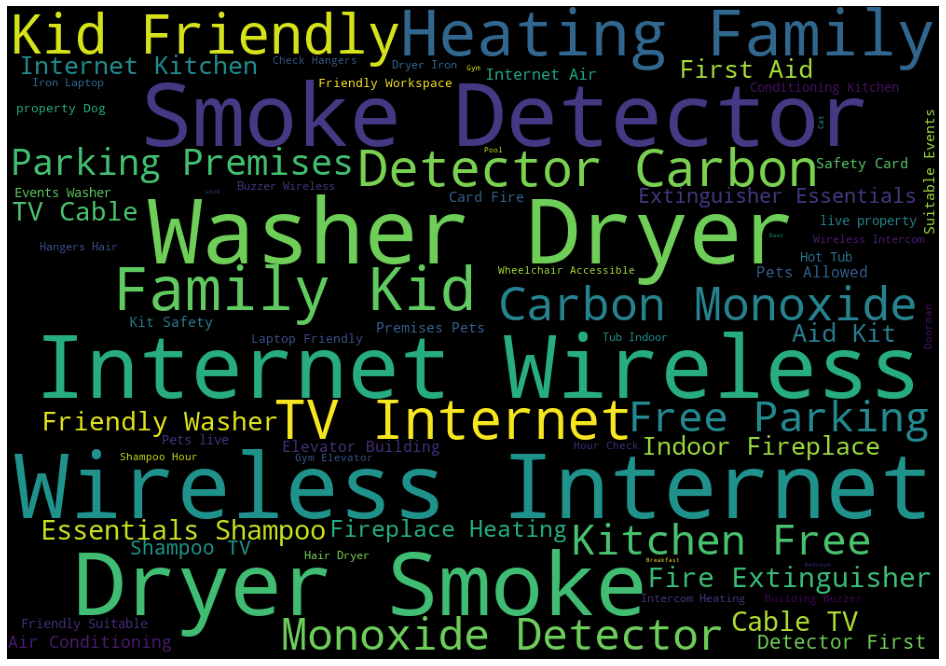

In [513]:
plot_display(allemenities_words)

Of all the amenities that we found and listed, the ones shown on the wordmap are the ones that are strongly related to price. Some of the main ones include Wireless Internet, smoke detector, Monoxide detector, Carbon monoxide detector, Essentials like shampoo, Free Parking and Family and kid friendly. These improve customer experience and also contribute to pricing. The more ammenities the host adds the pricier the listing

## EDA

While we have already done most of the EDA during data understanding, there's a few aspects that we haven't done. For instance, on the calender data set, we have not investigated the availability and price in relation to day of the week, week of the year, month of the year and year. We also have yet to determine if there are factors/ features that relate to or affect price. We also want to uncover neighbourhood trends, find out which times are busiest in Seattle and how the price is affected by those changes. In answer to some of our data mining objectives

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

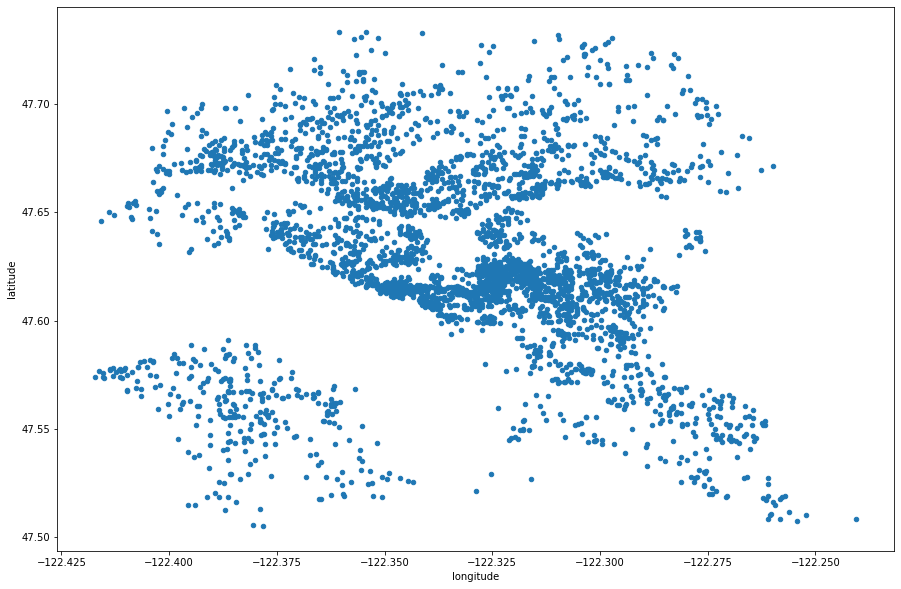

In [692]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
listings_df.plot.scatter('longitude', 'latitude', ax=ax)

#### Revisiting the review Data

In [71]:
nltk.download('vader_lexicon')

!pip install langdetect

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/fucking/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [72]:
reviewsDF=reviews_df

We want to understand the general sentiments in the comments whether they were positive, negative or neutral. In order to do that, we use a built-in NLTK library. To read and score each comment on a polariser


In [73]:
# Our dataframe consists of reviews in different language as well.Hence removing the comments which are not in english
from langdetect import detect

def detect_lang(sente):
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"

for index,row in reviewsDF.iterrows():
    lang=detect_lang(row['comments'])
    reviewsDF.at[index,'language'] = lang
#     print(lang)
    
#taking rows whose language is English
EngReviewsDF=reviewsDF[reviewsDF.language=='en']

EngReviewsDF.head[:5]

TypeError: 'method' object is not subscriptable

We check for positive polarity in the sentiments  on the reviews section

In [703]:
polarDF=EngReviewsDF[['pos']]
polarDF=polarDF.groupby(pd.cut(polarDF["pos"], np.arange(0, 1.1, 0.1))).count()
polarDF=polarDF.rename(columns={'pos':'count_of_Comments'})
polarDF=polarDF.reset_index()
polarDF=polarDF.rename(columns={'pos':'range_i'})
for i,r in polarDF.iterrows():
    polarDF.at[i,'RANGE'] = float(str(r['range_i'])[1:4].replace(',',''))
    polarDF.at[i,'Sentiment'] = 'positive'
del polarDF['range_i']
polarDF.head()

,count_of_Comments,RANGE,Sentiment
0,202,0.0,positive
1,1792,0.1,positive
2,3712,0.2,positive
3,2890,0.3,positive
4,1319,0.4,positive


We check for negative polarity as well

In [704]:
polarDFneg=EngReviewsDF[['neg']]
polarDFneg=polarDFneg.groupby(pd.cut(polarDFneg["neg"], np.arange(0, 1.1, 0.1))).count()
polarDFneg=polarDFneg.rename(columns={'neg':'count_of_Comments'})
polarDFneg=polarDFneg.reset_index()
polarDFneg=polarDFneg.rename(columns={'neg':'range_i'})
for i,r in polarDFneg.iterrows():
    polarDFneg.at[i,'RANGE'] = float(str(r['range_i'])[1:4].replace(',',''))
    polarDFneg.at[i,'Sentiment'] = 'negative'
del polarDFneg['range_i']
for i,r in polarDFneg.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFneg.head()

,count_of_Comments,RANGE,Sentiment
0,3180,0.0,negative
1,130,0.1,negative
2,8,0.2,negative
3,1,0.3,negative
4,0,0.4,negative


Checking for neutral sentiments as well

In [705]:
polarDFneut=EngReviewsDF[['neu']]
polarDFneut=polarDFneut.groupby(pd.cut(polarDFneut["neu"], np.arange(0, 1.0, 0.1))).count()
polarDFneut=polarDFneut.rename(columns={'neu':'count_of_Comments'})
polarDFneut=polarDFneut.reset_index()
polarDFneut=polarDFneut.rename(columns={'neu':'range_i'})
for i,r in polarDFneut.iterrows():
    polarDFneut.at[i,'RANGE'] = float(str(r['range_i'])[1:4].replace(',',''))
    polarDFneut.at[i,'Sentiment'] = 'neutral' 
del polarDFneut['range_i']

for i,r in polarDFneut.iterrows():
    polarDF=polarDF.append(pd.Series([r[0],r[1],r[2]],index=['count_of_Comments','RANGE','Sentiment']),ignore_index=True)
    
polarDFneut.head()


,count_of_Comments,RANGE,Sentiment
0,1,0.0,neutral
1,17,0.1,neutral
2,83,0.2,neutral
3,208,0.3,neutral
4,560,0.4,neutral


Then we plot the polarity of the sentiments against the number of compliments to see the general sentiment

/home/fucking/anaconda/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x720 with 0 Axes>

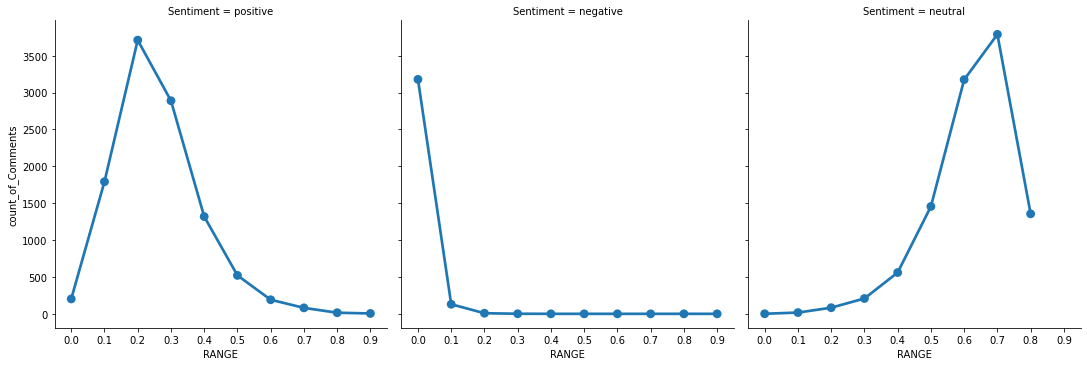

In [706]:
plt.figure(figsize=(10,10))
sns.factorplot(data=polarDF, x="RANGE", y="count_of_Comments",col="Sentiment") 

There are very few negative comments, neutral sentiments are skewed towards the range. 

Text(0, 0.5, 'Number of reviews')

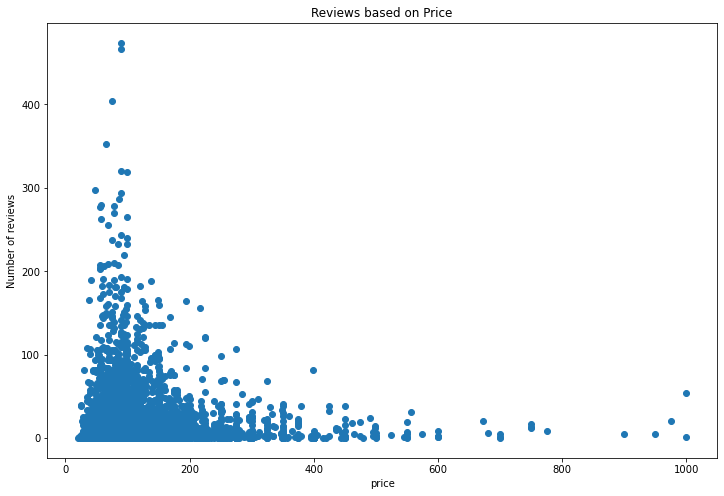

In [711]:
inputDF = pd.read_csv("listings.csv", delimiter=',')

inputDF=inputDF[['number_of_reviews','price','review_scores_rating']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

price_review = inputDF[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")

There are more reviews concentrated around a certain price range of between up to $ 250. We see here that customers prefer cheaper listings and use cheaper listings more hence the many reviews

#### Revisiting the calender data

In [614]:
calender_df[:5]

,listing_id,date,available,price,dayofweek,weekofyear,month,year,day_Name,holiday,us_holidays_name
0,241032,2016-01-04,1,85.000000,0,1,1,2016,default,False,working
1,241032,2016-01-05,1,85.000000,1,1,1,2016,default,False,working
2,241032,2016-01-06,0,137.090652,2,1,1,2016,default,False,working
3,241032,2016-01-07,0,137.090652,3,1,1,2016,default,False,working
4,241032,2016-01-08,0,137.090652,4,1,1,2016,default,False,working


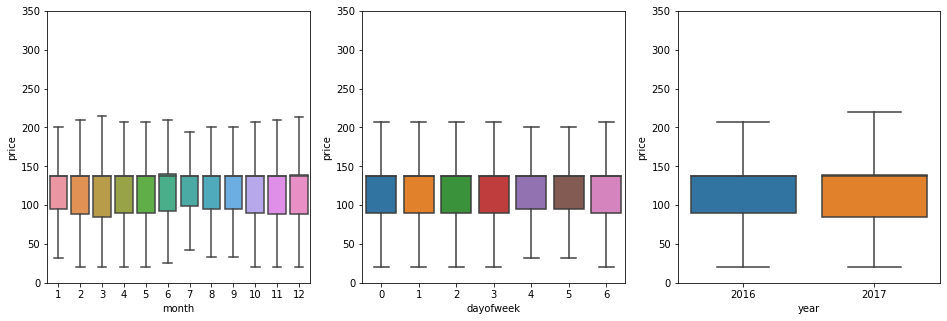

In [597]:
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
sns.boxplot(data=calender_df, x='month', y='price', ax=axs[0], fliersize=0)
sns.boxplot(data=calender_df, x='dayofweek', y='price', ax=axs[1], fliersize=0)
sns.boxplot(data=calender_df, x='year', y='price', ax=axs[2], fliersize=0)
for ax in axs:
    ax.set_ylim(0, 350)

The price of listings is highest between day 3 and 4 of the week, and month 6 to 9 of the year.

In [605]:
# we modify the data to include average price and a year and month column
yearDF=calender_df.groupby(['year','month']).price.mean()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'price':'average_Price'})
yearDF['year-Month']=yearDF['year'].map(str) + "-" + yearDF['month'].map(str)
yearDF.to_csv('./year_month_data.csv')
yearDF[::5]

,year,month,average_Price,year-Month
0,2016,1,128.293029,2016-1
5,2016,6,143.543198,2016-6
10,2016,11,135.396148,2016-11


Text(0, 0.5, 'Average Price')

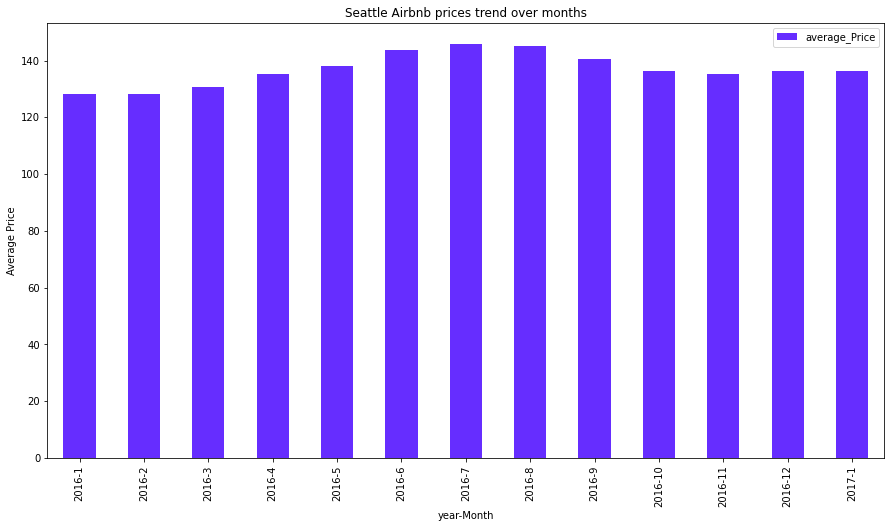

In [611]:
yearDF.plot(kind="bar",x='year-Month', y='average_Price',color = '#662dff', figsize =(15,8), 
           title = 'Seattle Airbnb prices trend over months')
plt.ylabel('Average Price')

The average price is more or less the same throughout 2016 with a hike between June and Sept as seen earlier in the analysis

In [631]:
!pip install holidays

Another useful library for calender analysis is to install the holiday library so that we know each holiday in the US to see if the days and or dates with higher prices corresponded to holidays

In [628]:
# We make a copy of the dataset so that we mess with the copy and preserve the original
calendarDF=calender_df.copy()

In [629]:
#replacing NaN values with 0
calendarDF.fillna(0, inplace=True)
calendarDF = calendarDF[calendarDF.price != 0]

#Extracting prices from the table
price = calendarDF['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
    
#replace the price column with the new column
calendarDF['price']=prices

calendarDF = calendarDF[calendarDF.price >= 0]

#separating date column into day month and year
calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str
calendarDF.head()

<ipython-input-629-91ebf8a550a9>:19: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str


,listing_id,date,available,price,Year,Month,Day
0,241032,2016-01-04,t,85.0,2016,01,04
1,241032,2016-01-05,t,85.0,2016,01,05
9,241032,2016-01-13,t,85.0,2016,01,13
10,241032,2016-01-14,t,85.0,2016,01,14
14,241032,2016-01-18,t,85.0,2016,01,18


Now that we have recreated the calender data set like we did before and seperated the datetime to day, month and year, we can use these for our EDA. Having installed the holidays, we add them to the data set

In [630]:
from datetime import date
import datetime
import calendar
import holidays

calendarDF.fillna(0, inplace=True)
us_holidays = holidays.UnitedStates()

calendarDF['day_Name']='default'
calendarDF['holiday']='False'
calendarDF['us_holidays_name']='working'
for index,row in calendarDF.iterrows():
    sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
    vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays
    calendarDF.at[index,'day_Name'] = calendar.day_name[sdate.weekday()]
    calendarDF.at[index,'holiday'] = vall
    calendarDF.at[index,'us_holidays_name'] = us_holidays.get(sdate)
calendarDF.to_csv('./holidays_data.csv')
calendarDF.head()

,listing_id,date,available,price,Year,Month,Day,day_Name,holiday,us_holidays_name
0,241032,2016-01-04,t,85.0,2016,01,04,Monday,False,None
1,241032,2016-01-05,t,85.0,2016,01,05,Tuesday,False,None
9,241032,2016-01-13,t,85.0,2016,01,13,Wednesday,False,None
10,241032,2016-01-14,t,85.0,2016,01,14,Thursday,False,None
14,241032,2016-01-18,t,85.0,2016,01,18,Monday,True,Martin Luther King Jr. Day


We estimate and calculate the average price of listings per day to see the trend of prices per day of the week

In [632]:
#calculating Average price for each day

dayDF=calendarDF.groupby('day_Name').price.mean()
dayDF=dayDF.reset_index()
dayDF['day_num']=0

for index,row in dayDF.iterrows():
    if row['day_Name']=='Monday':
        dayDF.at[index,'day_num']=1
    if row['day_Name']=='Tuesday':
        dayDF.at[index,'day_num']=2
    if row['day_Name']=='Wednesday':
        dayDF.at[index,'day_num']=3
    if row['day_Name']=='Thursday':
        dayDF.at[index,'day_num']=4
    if row['day_Name']=='Friday':
        dayDF.at[index,'day_num']=5
    if row['day_Name']=='Saturday':
        dayDF.at[index,'day_num']=6
    if row['day_Name']=='Sunday':
        dayDF.at[index,'day_num']=7
dayDF=dayDF.sort_values('day_num',ascending=[1])
dayDF=dayDF.rename(columns={'price':'Average_Price'})
dayDF

,day_Name,Average_Price,day_num
1,Monday,135.676414,1
5,Tuesday,135.408764,2
6,Wednesday,135.447880,3
4,Thursday,136.476032,4
0,Friday,143.036294,5
2,Saturday,143.202136,6
3,Sunday,136.459941,7


What we see is that the average price is higher on weekends between Friday and Saturday

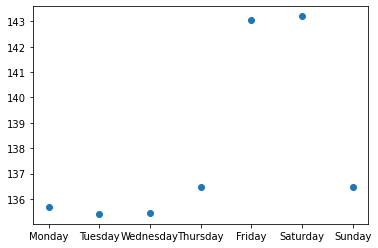

In [633]:
import matplotlib.pyplot as plt
dayname = list()
for i in dayDF['day_Name']:
    dayname.append(i)
avgprice = list()
for i in dayDF['Average_Price']:
    avgprice.append(i)
graph_input = dict(zip(dayname,avgprice))

plt.scatter(dayname,avgprice)
plt.show()

In [636]:
calendarDF.groupby('us_holidays_name').listing_id.count()

us_holidays_name
Christmas Day                 2829
Christmas Day (Observed)      2831
Columbus Day                  2650
Independence Day              2371
Labor Day                     2544
Martin Luther King Jr. Day    2231
Memorial Day                  2583
New Year's Day                2922
New Year's Day (Observed)     2776
Thanksgiving                  2746
Veterans Day                  2718
Washington's Birthday         2529
Name: listing_id, dtype: int64

In general, all holidays have bookings with New Year's day being the highest.

In [637]:
calendarDF.groupby('us_holidays_name').price.mean()

us_holidays_name
Christmas Day                 137.974903
Christmas Day (Observed)      137.895797
Columbus Day                  134.985660
Independence Day              151.402362
Labor Day                     142.087264
Martin Luther King Jr. Day    121.740475
Memorial Day                  143.233837
New Year's Day                138.126968
New Year's Day (Observed)     135.572767
Thanksgiving                  136.054989
Veterans Day                  140.070272
Washington's Birthday         125.353895
Name: price, dtype: float64

Independence day has the highest price, Martin Luther King Jr Day and Washington's Birthday being the cheapest.

Independence day affectionately known as the 4th of July in the USA is sometimes celebrated as a long weekend. So we check the average prices over the weekends. Especially around July as trends have shown a spike in prices between June and August.

In [638]:
# analyzing data from date 4th of July to date 13th of July which includes both long weekend 
#and normal workdays to compare prices 


marDF=calendarDF[(calendarDF['Year'] == '2016') & (calendarDF['Month'] == '07' )& 
                 ((calendarDF['Day'] == '04' )|(calendarDF['Day'] == '05' )|(calendarDF['Day'] == '06' )
                  | (calendarDF['Day'] == '07' )| (calendarDF['Day'] == '08' )| (calendarDF['Day'] == '09' )
                  | (calendarDF['Day'] == '10' )| (calendarDF['Day'] == '11' )| (calendarDF['Day'] == '12' )
                  | (calendarDF['Day'] == '13' ))]
marDF=marDF.groupby('Day').price.mean()
marDF=marDF.reset_index()
marDF=marDF.sort_values('Day',ascending=[1])
marDF=marDF.rename(columns={'price':'Average_Price'})
marDF.head(10)

,Day,Average_Price
0,04,151.402362
1,05,150.522832
2,06,150.200837
3,07,150.709570
4,08,156.260469
5,09,156.448161
6,10,150.302538
7,11,149.866250
8,12,150.058504
9,13,150.656785


Clearly and conclusively, weekends cost more than week days. A plot of average price per day of the week should show this

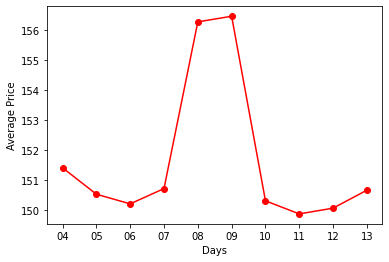

In [649]:
x=marDF['Day'].tolist()
y=marDF['Average_Price'].tolist()
plt.plot(x,y, 'ro-')
plt.ylabel('Average Price')
plt.xlabel('Days')
plt.show()

This answers our data mining question of what the **busiest times in Seattle are and how the prices change. From our analysis, the summer is the busiest times in seattle and prices are higher**. The Independence day holiday is the most expensive to visit in though holidays in general are pricier. Good holidays to visit seattle on are Martin Luther King Jr and Washington's birthday. Weekends are also pricer than week days

Since we have NLT we can utilise it to process the text features

In [654]:
summary = listings_df[['summary','price']]
summary = summary[pd.notnull(summary['summary'])]
summary = summary[summary['summary']!=0]
summary = summary.sort_values('price',ascending=[0])
top100DF = summary.head(1000)

In [657]:
from nltk.corpus import stopwords
import string

words=''
for index,row in top100DF.iterrows():
    words += row['summary']
    
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:500]

'100 walk score close convention center westlake station pike place market amazon belltown capitol hill spotless reliable accommodating professional host apartment lower level classic 1915 craftsman bungalow heart wallingford walk score 93 ideally located 45th 50th block restaurant grocery store drug stores.walk downtown seattle attraction charming b b tree-lined side street capitol hill neighborhood.awesome two bedroom condo perfect convention traveler business traveler couple wanting see enjoy '

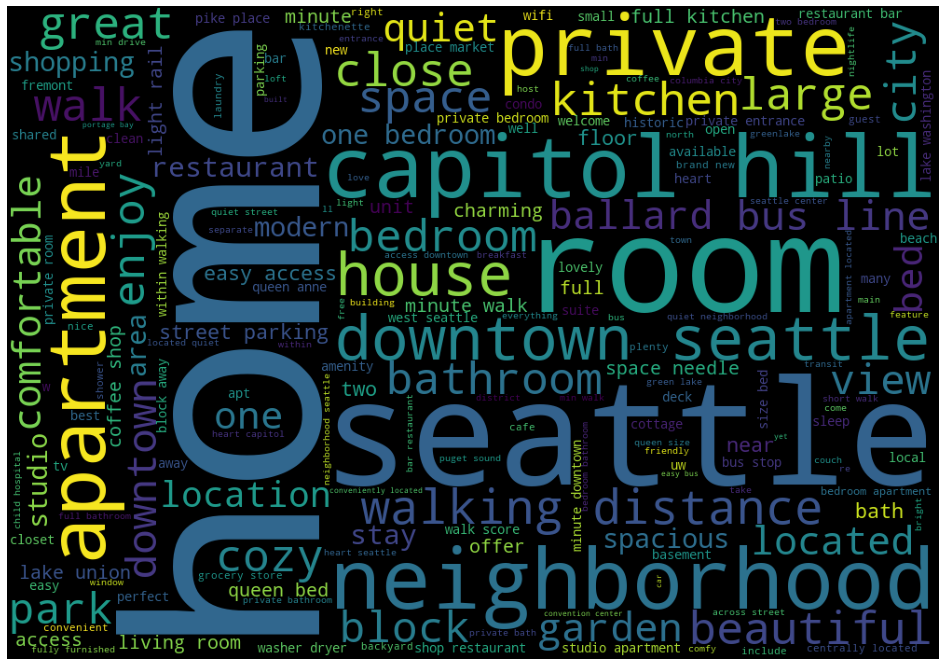

In [658]:
plot_display(final_words)

The most frequently used words in listing summary are home, room, downtown, apartment,neighbourhd, garden, ballard bus line, bathroom. Hosts listing houses should use these key words to get more customers

#### Revisiting Price related metrics

In [ ]:
some_features=listings_df[['id','property_type','price','room_type','beds','bedrooms',
                          'neighbourhood_cleansed','bathrooms','accommodates','latitude','longitude']]
some_features.fillna(0,inplace=True)
some_features['price'] = some_features['price'].str.extract(r'(\d+)', expand=False)
# make price float
some_features['price'] = some_features['price'].astype(float, errors = 'raise')
some_features = some_features[some_features.bathrooms >0]
some_features = some_features[some_features.beds >0]
some_features = some_features[some_features.price >0]
some_features = some_features[some_features.accommodates >0]
some_features.head()

(87.5, -0.5)

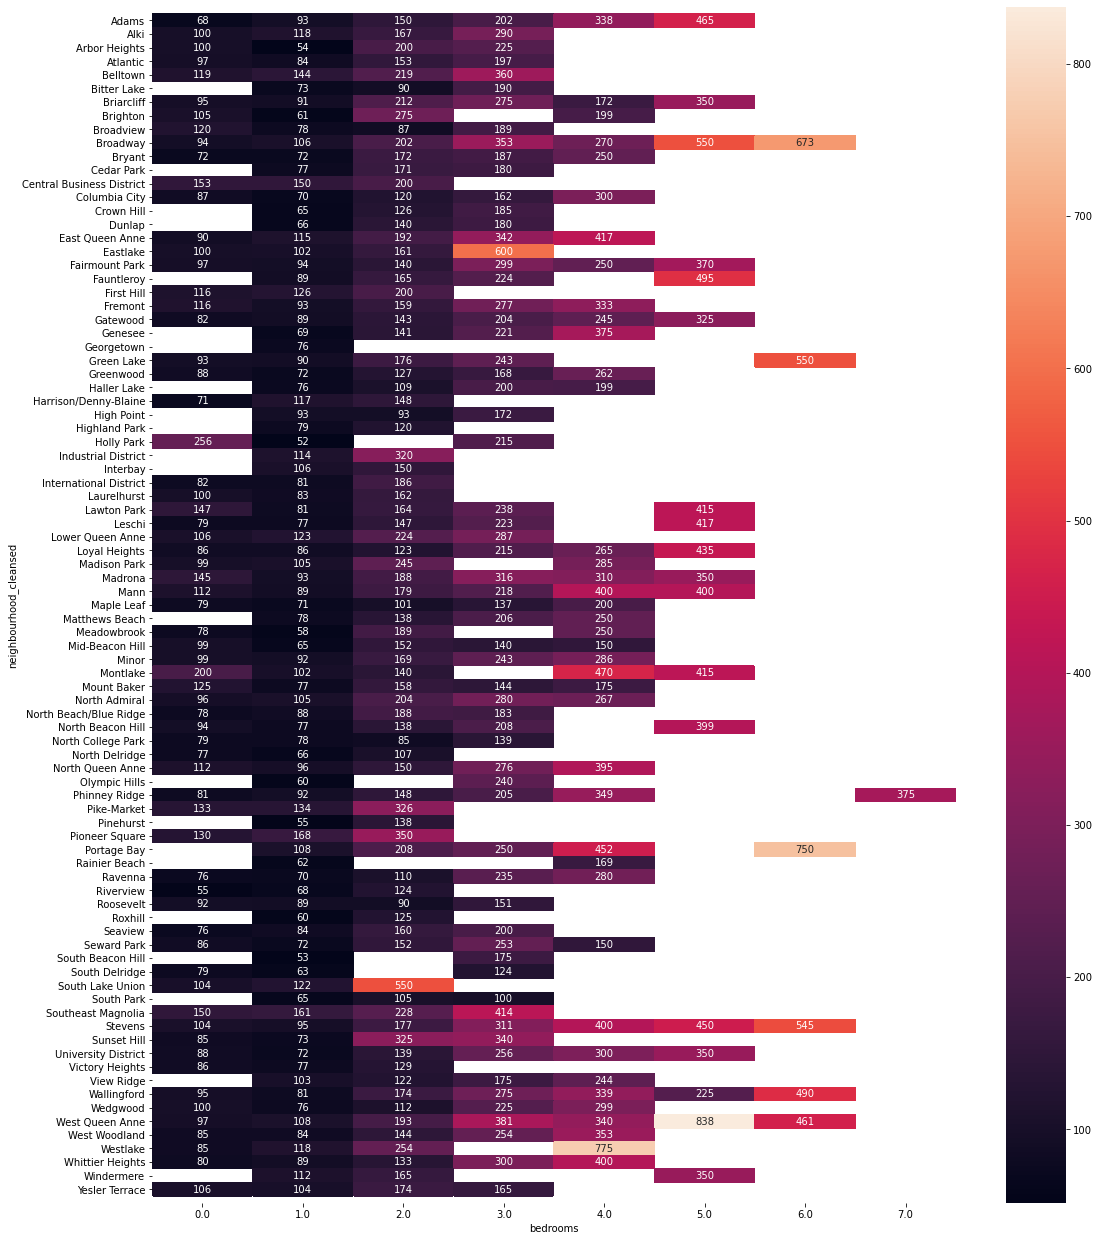

In [685]:
plt.figure(figsize=(18,22))
ax = sns.heatmap(some_features.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The heatmap shows that the number of bed rooms greatly affect price, the more the bedrooms the higher the price but neighbourhood is also important. As expected some neighbourhoods with fewer bedrooms will be more expensive vice versa

<AxesSubplot:xlabel='room_type', ylabel='property_type'>

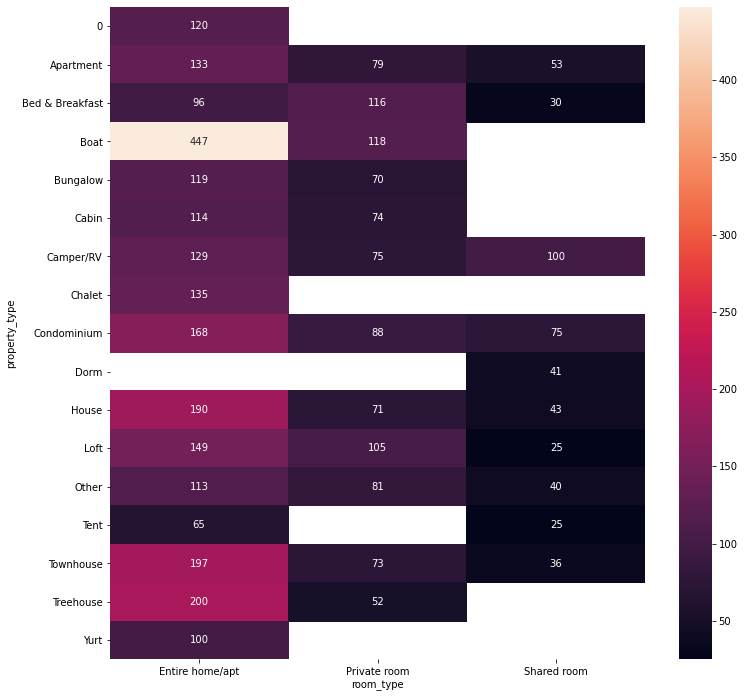

In [686]:
# apartments are the most expensive room type,in 
plt.figure(figsize=(12,12))
sns.heatmap(some_features.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

The room type certainly affects the price, apartments are the most expensive followed by boats.

<AxesSubplot:xlabel='bedrooms'>

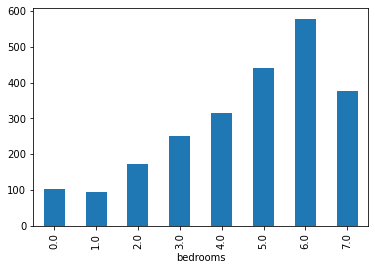

In [687]:
some_features.groupby(['bedrooms']).price.mean().plot(kind="bar")

### Key Findings from the Analysis of the data

 When we started we sort to understand and answer these questions:
   1. What features of the listings are related to price?    
   2. What vibes are happening in each neighbourhood?    
   3. Are there factors/metrics for that help understand customer experience?    
   4. Are there things that guests/AirBnB can do to boost guest experience and get more clients?
   5. Has there been an increase in the number of AirBnb hosts?
   6. What are the busiest times of the year in seattle and by how much do the prices change
   
Our Analysis of the data has uncovered these findings. 
 
 **Price**
  + The neighbourhood, number of beds, how many nights the guest will be staying, whether they have extra guests, the day of the week, the months, the neighbourhood, whether its a holiday and Amenities provided
  + Of all the amenities that we found and listed, the ones shown on the wordmap are the ones that are strongly related to price. Some of the main ones include *Wireless Internet, smoke detector, Monoxide detector, Carbon monoxide detector, Essentials like shampoo, Free Parking and Family and kid friendly*. These improve customer experience and also contribute to pricing. **The more ammenities the host adds the pricier the listing**
  + Appartments and houses are the most common properties with 45% and 44.7% of all the listings of room types and they are the most expensive
  
**Vibes in each neighbourhood**
  + Broadway is the most frequently listed neighbourhood which occurs 397 times
  + We see that there are zipcodes that have more listings like the 98122, 98103 and 98102. These are generally higher, the bulk of the listings are on average the same until we get to 98104. Then we see 98199, 126,106,108,133,136 have about the same listings around the 50-60 listings average
  
**Has there been an increase in AirBnb's hosts
  + Since 2008 to 2016. In 10 years, there was a growth from 4 listings to 3816 listings, the growth is exponential. Between 2009 and 2011 the growth rate doubled at a average growth rate of 140% per year. From 2011 the growth rate steadied to an average growth rate of 30%. About 50% of hosts joined July 2013
  
**Busiest times in Seattle and how prices change**
  + The summer is the busiest times in seattle, between June and August. Prices are highest during these times. Holidays are generally higher priced on average than normal days.The Independence day holiday is the most expensive to visit in, in Seattle. Good holidays to visit seattle on are Martin Luther King Jr and Washington's birthday, they are cheaper as well. Weekends are also higher priced than week days, prices go up on Friday and Saturday
  
**Customer metrics**
  + reviews per month and review score rating features are useful features for understanding customer experience and thus improving customer experience. As expected some users/hosts have many reviews but fewer reviews per month suggesting they have been listed longer but not neccesarily that they are perfoming better than those with fewer number of ratigs but higher reviews per month

##  Data Preparation

Our business understanding is broad, we sought to understand features that we can link to the customer experience and features that affect pricing. As we come down to preparing the data for modelling, we realise that we need to narrow down to one aspect to be investigated fully first then as time permits we can do the other one. We will start with and narrow our focus on price first. We will model price prediction.

What we have already learned about price from our EDA has revealed the features that seem to be related to or affect pricing. We will focus on these features. We concluded that:

   + Amenities
   + number of reviews
   + propety type
   + room type
   + neighbourhood
   + number of beds
   + how many nights 
   + The guest will be staying
   + The day of the week, the months
   + Whether its a holiday 
   + Amenities provided: and on the ammenities we provided a list of amenities that are essential

We will now clean and prepare the columns with these and related features. Fill in missing values. Convert the categorical variables into one hot encoded dummies

#### Selecting the columns that we want

We have 3 datasets:

    calendar.csv - calendar data for the listings: availability dates, price for each date.
    listings.csv - summary information on listing in Seattle such as: location, host information, cleaning and   guest fees, amenities etc.
    reviews.csv - summary review data for the listings.
We will only use the calender data and listings, the reviews is in textual format so we wont be modelling it. During our EDA we have already predetermined the columns that affect price, so here we just list them

In [132]:
#Select only the columns which we are interested in

selected_listings_cols = [
    'id', 'zipcode', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
 'beds', 'bed_type', 'amenities', 'price', 'weekly_price', 'monthly_price', 'security_deposit',
 'cleaning_fee', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
 'review_scores_location', 'review_scores_value', 'cancellation_policy',
]

new_listings_df = listings_df[selected_listings_cols]
new_listings_df['price'][:5]


0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64

**Drop missing values**

In [133]:
# Drop rows with missing values of the number of reviews
# Drop rows with missing values of the bathrooms
# Drop rows with missing values of the property type

review_scores_cols = [col for col in listings_df.columns if 'review_scores' in col]
drop_cols = ['number_of_reviews','bathrooms','property_type'] + review_scores_cols

new_listings_df.dropna(subset = drop_cols, axis = 0, inplace = True)

# Drop rows where the number of reviews is 0.
new_listings_df = new_listings_df[new_listings_df['number_of_reviews'] != 0]

# Drop rows where the amenities are empty
new_listings_df = new_listings_df[new_listings_df['amenities'] != '{}']

# Reset index
new_listings_df = new_listings_df.reset_index(drop = True)

<ipython-input-133-45b57bcb1fc0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_listings_df.dropna(subset = drop_cols, axis = 0, inplace = True)


**Fill missing values**

In [134]:
# Fill missing values of the bedrooms and beds as 1
new_listings_df[['bedrooms', 'beds']] = new_listings_df[['bedrooms', 'beds']].fillna(value = 1)

In [135]:
# Change the data type of the price and related columns and fill missing values as 0
new_listings_price_df = new_listings_df[['price','weekly_price','monthly_price','security_deposit','cleaning_fee']]

for col in ['price','weekly_price','monthly_price','security_deposit','cleaning_fee']:
    new_listings_price_df = pd.concat([new_listings_price_df.drop(columns = [col]), new_listings_price_df[col].str.replace('$','').str.replace(',','').astype(float)], axis = 1)
    


AttributeError: Can only use .str accessor with string values!

In [136]:
new_listings_price_df.fillna(value = 0, inplace =True)

/home/fucking/anaconda/lib/python3.8/site-packages/pandas/core/frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [158]:
# Calculate weekly and monthly price
new_listings_price_df['calc_weekly_price'] = new_listings_price_df['price'] * 7
new_listings_price_df['calc_monthly_price'] = new_listings_price_df['price'] * 30
new_listings_price_df[:5]


<ipython-input-158-c05eff8d17ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_listings_price_df['calc_weekly_price'] = new_listings_price_df['price'] * 7
<ipython-input-158-c05eff8d17ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_listings_price_df['calc_monthly_price'] = new_listings_price_df['price'] * 30


,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,595.0,2550.0,0.0,0.0,595.0,2550.0
1,150.0,1.0,3.0,100.0,40.0,1050.0,4500.0
2,975.0,6825.0,29250.0,1.0,300.0,6825.0,29250.0
3,450.0,3150.0,13500.0,700.0,125.0,3150.0,13500.0
4,120.0,800.0,3600.0,0.0,40.0,840.0,3600.0


In [159]:
# Fill the weekly and monthky price by its calculated values
for idx, row in new_listings_price_df.iterrows():
    if row['weekly_price'] == 0:
        new_listings_price_df.loc[idx, ['weekly_price']] = row['calc_weekly_price']
    if row['monthly_price'] == 0:
        new_listings_price_df.loc[idx, ['monthly_price']] = row['calc_monthly_price']

new_listings_price_df[:5]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,calc_weekly_price,calc_monthly_price
0,85.0,595.0,2550.0,0.0,0.0,595.0,2550.0
1,150.0,1.0,3.0,100.0,40.0,1050.0,4500.0
2,975.0,6825.0,29250.0,1.0,300.0,6825.0,29250.0
3,450.0,3150.0,13500.0,700.0,125.0,3150.0,13500.0
4,120.0,800.0,3600.0,0.0,40.0,840.0,3600.0


In [160]:
#drop the calculated prices columns
new_listings_price_df.drop(columns = ['calc_weekly_price', 'calc_monthly_price'], inplace = True)

/home/fucking/anaconda/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [153]:
new_listings_price_df

,price,weekly_price,monthly_price,security_deposit,cleaning_fee
0,85.0,595.0,2550.0,0.0,0.0
1,150.0,1.0,3.0,100.0,40.0
2,975.0,6825.0,29250.0,1.0,300.0
3,450.0,3150.0,13500.0,700.0,125.0
4,120.0,800.0,3600.0,0.0,40.0
...,...,...,...,...,...
3118,154.0,1.0,5.0,150.0,85.0
3119,65.0,455.0,1950.0,0.0,20.0
3120,95.0,600.0,2.0,500.0,0.0
3121,359.0,2513.0,10770.0,0.0,230.0


**Categorical values changed to dummy variable**

In [161]:
# Create dummy columns of cancellation policy, room type, property type and bed type

cancellation_policy_dummy_df = pd.get_dummies(new_listings_df['cancellation_policy'], prefix = 'cancellation_policy')
room_type_dummy_df = pd.get_dummies(new_listings_df['room_type'], prefix = 'room_type')
property_type_dummy_df = pd.get_dummies(new_listings_df['property_type'], prefix = 'property_type')
bed_type_dummy_df = pd.get_dummies(new_listings_df['bed_type'], prefix = 'bed_type')
bed_type_dummy_df

,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
3118,0,0,0,0,1
3119,0,0,0,0,1
3120,0,0,0,0,1
3121,0,0,0,0,1


**Create dummy variables based on amenities**

In [162]:
# Create dummy columns based on the ammenities

# Drop rows with empty rows
amenities_series = new_listings_df['amenities']
amenities_series = amenities_series[amenities_series != '{}']

# Iterate over rows and format them as list
amenities_list = []

for index, row in amenities_series.items():
    amenities_list.append(row.replace('{','').replace('}','').replace('"','').split(','))

# Convert the list to a data frame
amenities_df = pd.Series(amenities_list, name = 'amenities').to_frame()

# Create a dummy data frame
dummies_amenities_df = amenities_df.drop('amenities', 1).join(
    pd.get_dummies(
        pd.DataFrame(amenities_df.amenities.tolist()).stack()
    ).astype(int).sum(level=0)
)

# Reset index
# dummies_amenities_df = dummies_amenities_df.reset_index(drop=True)
dummies_amenities_df[:5]

,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
1,0,0,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,0,1
2,0,1,0,0,1,1,1,1,0,1,...,0,1,1,0,0,1,1,0,0,1
3,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [165]:
dummy_df = pd.concat([cancellation_policy_dummy_df, room_type_dummy_df, property_type_dummy_df, bed_type_dummy_df, dummies_amenities_df], axis = 1)
dummy_df[:5]


,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Bungalow,...,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,0,0,1,1,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,0,1
2,0,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,1
3,0,0,1,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


**Concatinate the dummy dataframes together**

In [177]:
concat_listings_df =pd.concat([dummy_df,new_listings_price_df],axis=1)
concat_listings_df ['price']

#pd.concat([new_listings_df.select_dtypes(include = ['int', 'float']), new_listings_price_df, dummy_df], axis = 1)

0        85.0
1       150.0
2       975.0
3       450.0
4       120.0
        ...  
3118    154.0
3119     65.0
3120     95.0
3121    359.0
3122     79.0
Name: price, Length: 3123, dtype: float64

In [735]:
# Create a list which contains always non available listing_id
always_f_listing_id = list(calender_df.groupby('listing_id')['available'].sum().loc[lambda x : x == 0].index.values)

In [745]:
calender_df[:5]

,listing_id,date,available,price,dayofweek,weekofyear,month,year
0,241032,2016-01-04,1,85.000000,0,1,1,2016
1,241032,2016-01-05,1,85.000000,1,1,1,2016
2,241032,2016-01-06,0,137.090652,2,1,1,2016
3,241032,2016-01-07,0,137.090652,3,1,1,2016
4,241032,2016-01-08,0,137.090652,4,1,1,2016


In [746]:
calender_df.isna().sum()

listing_id    0
date          0
available     0
price         0
dayofweek     0
weekofyear    0
month         0
year          0
dtype: int64

## Data Modelling

We will use 
   + concat_listings_df and the calender_df

In [184]:
concat_listings_df.columns

Index(['cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room',
       'property_type_Apartment', 'property_type_Bed & Breakfast',
       'property_type_Boat', 'property_type_Bungalow', 'property_type_Cabin',
       'property_type_Camper/RV', 'property_type_Chalet',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Yurt', 'bed_type_Airbed',
       'bed_type_Couch', 'bed_type_Futon', 'bed_type_Pull-out Sofa',
       'bed_type_Real Bed', '24-Hour Check-in', 'Air Conditioning',
       'Breakfast', 'Buzzer/Wireless Intercom', 'Cable TV',
       'Carbon Monoxide Detector', 'Cat(s)', 'Dog(s)', 'Doorman', 'Dryer',
       'Elevator in Building', 'Essentials', 'Family/Kid Friendly'

In [185]:

selected_cols = [
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'cancellation_policy_flexible',
 'cancellation_policy_moderate',
 'cancellation_policy_strict',
 'room_type_Entire home/apt',
 'room_type_Private room',
 'room_type_Shared room',
 'property_type_Apartment',
 'property_type_Bed & Breakfast',
 'property_type_Boat',
 'property_type_Bungalow',
 'property_type_Cabin',
 'property_type_Camper/RV',
 'property_type_Chalet',
 'property_type_Condominium',
 'property_type_Dorm',
 'property_type_House',
 'property_type_Loft',
 'property_type_Other',
 'property_type_Tent',
 'property_type_Townhouse',
 'property_type_Treehouse',
 'property_type_Yurt',
 'bed_type_Airbed',
 'bed_type_Couch',
 'bed_type_Futon',
 'bed_type_Pull-out Sofa',
 'bed_type_Real Bed',
 '24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Wheelchair Accessible',
 'Wireless Internet'
                ]

### Machine Learning: Model Selection

We will start with XGBoost first because it is a complex and advanced gradient boosting algorith that can deal with many features ( our data set has too many variables)

In [221]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [222]:
X=concat_listings_df.drop(['price'],axis=1).select_dtypes(exclude=['object'])
y=concat_listings_df['price']

In [220]:
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
#set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 1.53466214  1.2987518   2.90972465 13.47652381  9.74081468  7.69373935
  2.41685525  0.8211285  11.37626548  0.40519549  0.57030881  0.34520482
  0.31617885  0.9355316   1.59113654  2.53268221  0.78594757  1.47508666
  0.39350675  0.95576457  0.97043513  0.09909161  1.74685022  0.96428115
  0.74663051  0.70456078  1.47429514  1.53097578  1.80095279  1.45991194
  1.55088211  2.31376894  1.11652724  1.07495732  0.98874016  2.92842166
  1.17212899  2.27682701  1.02246066  2.30845121  0.93481025  1.24830463
  1.31057935  2.64698341  1.51811673  1.46783559  1.14992775  2.44973911
  1.88447824  1.07653317  1.58715301  1.20123227  1.25092065  1.04704867
  0.44190869  1.13826204  1.55845695  3.05327576  1.22631481  1.24680062
  0.83378803  0.86773784  1.69089912  2.00411682  1.2468099   0.11179384
  1.24166705  0.95109599 11.99159758 13.29630536  2.89720016 11.95987119]
[[1.000e+00 5.950e+02 2.550e+03 0.000e+00]
 [1.000e+00 1.000e+00 3.000e+00 4.000e+01]
 [1.000e+00 6.825e+03 2.925e+04 3.000

In [ ]:
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/home/fucking/anaconda/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
/home/fucking/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fucking/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.



/home/fucking/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fucking/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

/home/fucking/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fucking/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

/home/fucking/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/fucking/anaconda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [195]:
# Train, test and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=99) 

In [206]:
# Create a model and fit the data to it 

xgb_model = XGBRegressor(
    max_depth=15,
    n_estimators=1000,
    min_child_weight=10, 
    colsample_bytree=0.6, 
    subsample=0.6, 
    eta=0.2,    
    seed=0,
    learning_rate = 0.05,
    n_jobs=2)

xgb_model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_val, y_val)], 
    verbose=10, 
    early_stopping_rounds = 5)

[0]	validation_0-rmse:147.14436	validation_1-rmse:146.99689
[10]	validation_0-rmse:95.54114	validation_1-rmse:95.90320
[20]	validation_0-rmse:64.75782	validation_1-rmse:66.27467
[30]	validation_0-rmse:47.27364	validation_1-rmse:48.85769
[40]	validation_0-rmse:38.16735	validation_1-rmse:41.10921
[50]	validation_0-rmse:32.86573	validation_1-rmse:36.87308
[60]	validation_0-rmse:29.69966	validation_1-rmse:34.57921
[70]	validation_0-rmse:27.70108	validation_1-rmse:33.17731
[80]	validation_0-rmse:26.40963	validation_1-rmse:32.58391
[90]	validation_0-rmse:25.15677	validation_1-rmse:31.58672
[100]	validation_0-rmse:24.32839	validation_1-rmse:31.16549
[103]	validation_0-rmse:24.15864	validation_1-rmse:31.21159


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, eta=0.2, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=15,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [207]:
xgb_train_pred = xgb_model.predict(X_train)
xgb_val_pred = xgb_model.predict(X_val)
xgb_test_pred = xgb_model.predict(X_test)

In [208]:
for i in [[y_train, xgb_train_pred], [y_val, xgb_val_pred], [y_test, xgb_test_pred]]:
    print(r2_score(i[0], i[1]))

0.9248414694882681
0.8683763163400222
0.916730205761942


The model actually performs relatively well with between 85 to 90% accuracy on the training data and testing data

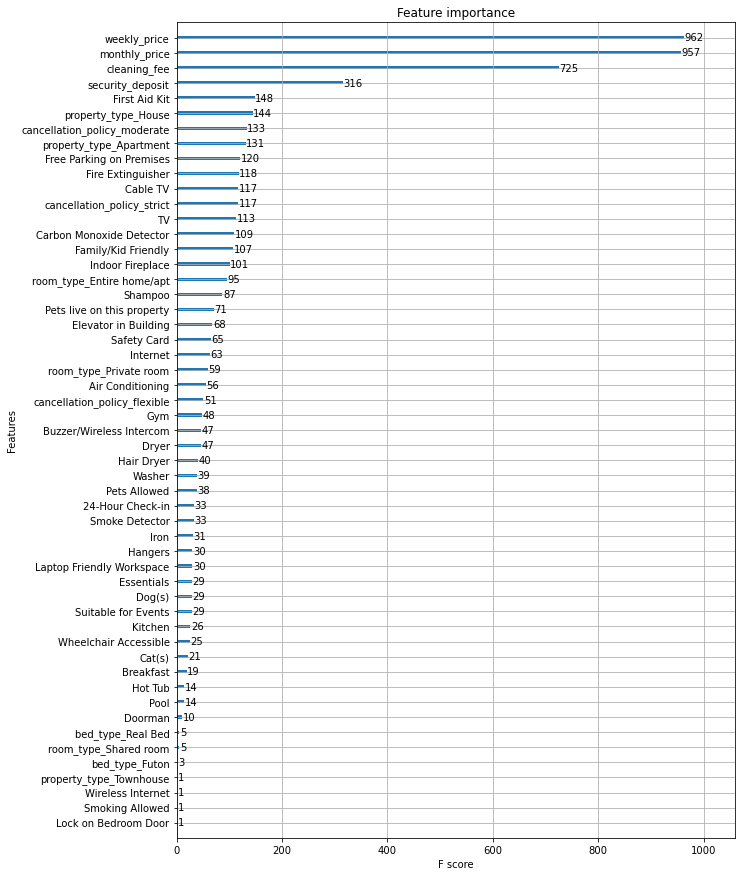

In [209]:
fig, ax = plt.subplots(figsize=(10, 15))
plot_importance(xgb_model,ax=ax);

The feature importances are not entirely consistent with our EDA findings possibly due to dimensionality problems and too much correlation. Perhaps we could revisit our feature engineering and reduce the features

## Customer Experience prediction

Our other busines objective was to determine if there are metrics that we can use to determine or understand customer experience. We have already done the EDA and feature engineering. We just have to do the final feature selection and model

In [213]:
df=listings_df.copy()

df['cx_score'] = df['review_scores_rating'] / 100 * df['reviews_per_month']


We found that there's a strong relation between reviews scores rating and reviews per month. Since we can only have one response variable, we can combine these two by multiply them. We call the column cx_score

In [214]:
listings_df['neighbourhood_cleansed'].value_counts()[:10]

Broadway                     397
Belltown                     234
Wallingford                  167
Fremont                      158
Minor                        135
University District          122
Stevens                      119
First Hill                   108
Central Business District    103
Lower Queen Anne              94
Name: neighbourhood_cleansed, dtype: int64

We list the top 10 neighbourhoods which we will use to model our data. We will choose one neighbourhood which we will use to model the data with